# Assignment 1 CAB330

In [ ]:
import pandas as pd
df = pd.read_csv("data/raw/covid-prediction.csv")


In [ ]:
# Install system Graphviz (has the `dot` binary)
!apt-get -qq install -y graphviz

# Install Python packages
!pip -q install pydot graphviz

# Verify Graphviz is available
import shutil, pydot
print("dot path:", shutil.which("dot"))
!dot -V


## Task 1
### Q1

In [242]:
# Value count for risk infection
print(df['risk_infection'].value_counts())
print("\nIn the following, there are 2464 at risk for infection while 2536 are not at risk for infection.")

# Proportions for risk infections
proportions = df['risk_infection'].value_counts(normalize=True) * 100
print("\nproportions:")
print(proportions.round(2))
print("\nIn the following, it can then be seen that the proportion for those who are at risk for infection is 50.72 to 49.28 (where 50.72 is for those who are not at risk for infection).")

0.0    2536
1.0    2464
Name: risk_infection, dtype: int64

In the following, there are 2464 at risk for infection while 2536 are not at risk for infection.

proportions:
0.0    50.72
1.0    49.28
Name: risk_infection, dtype: float64

In the following, it can then be seen that the proportion for those who are at risk for infection is 50.72 to 49.28 (where 50.72 is for those who are not at risk for infection).


## Task 1
### Q2

In [243]:
#1) Create initial variable catalog
# - Variable: column name
# - Type: pandas dtype (string)
# - Role: Target for 'risk_infection', Input for others (will refine below)
# - Notes: Free text to justify keep/drop decision

variable_catalog = pd.DataFrame({
    "Variable": df.columns,
    "Type": df.dtypes.astype(str),
    "Role":["Target" if col == "risk_infection" else "Input" for col in df.columns],
    "Notes": ""
})

# 2) Marking the target clearly
variable_catalog.loc[
    variable_catalog["Variable"] == "risk_infection",
    "Notes"
] = "Target Variable: 0 = low risk, 1 = high risk"


# 3)  Variables to drop (irrelevant or leakage)
#List of variables to drleop
drop_vars = ['risk_mortality', 'survey_date', 'ip_latitude', 'ip_longitude', 'ip_accuracy']

# Checking to see if these variables exist in the DF
drop_vars_exist = [c for c in drop_vars if c in variable_catalog["Variable"].values]

# Set Roles for these varaibles to Dropped
variable_catalog.loc[variable_catalog["Variable"].isin(drop_vars_existing), "Role"] = "Dropped"

# If you want to be safe, only drop those that actually exist in the dataframe
drop_vars_existing = [c for c in drop_vars if c in df.columns]
variable_catalog.loc[
    variable_catalog["Variable"].isin(drop_vars_existing),
    "Role"
] = "Dropped"


# 4) Add Notes for dropped variables (why we drop them)
# Set Notes for each
variable_catalog.loc[variable_catalog["Variable"] == "risk_mortality", "Notes"] = \
    "Dropped: Leakage from external/derived risk score"

variable_catalog.loc[variable_catalog["Variable"] == "survey_date", "Notes"] = \
    "Dropped: Date stamp, not predictive for infection risk"

variable_catalog.loc[variable_catalog["Variable"].isin(["ip_latitude", "ip_longitude", "ip_accuracy"]), "Notes"]  = \
    "Dropped: Detailed geolocation, not used in modelling"

# 5) Add Notes for kept variables (your chosen candidate inputs)
keep_notes = {
     # Demographic Information
    "region": "Keep: Demographic (region category)",
    "country": "Keep: Demographic (country category)",
    "gender": "Keep: Demographic (gender)",
    "age": "Keep: Demographic (age quantile)",
    "height": "Keep: Demographic (height in cm)",
    "weight": "Keep: Demographic (weight in kg)",
    "bmi": "Keep: Demographic (body mass index)",
    "blood_type": "Keep: Demographic (blood group)",
    "insurance": "Keep: Demographic (insurance status)",
    "income": "Keep: Demographic (income category)",
    "race": "Keep: Demographic (race category)",
    "immigrant": "Keep: Demographic (immigrant status)",

    # Behavioural Factors
    "smoking": "Keep: Behavioural (smoking frequency)",
    "alcohol": "Keep: Behavioural (alcohol consumption level)",
    "cannabis": "Keep: Behavioural (cannabis use level)",
    "amphetamines": "Keep: Behavioural (amphetamines use level)",
    "cocaine": "Keep: Behavioural (cocaine use level)",
    "contacts_count": "Keep: Behavioural (people contacted)",
    "house_count": "Keep: Behavioural (household size)",
    "public_transport_count": "Keep: Behavioural (public transport contacts)",
    "working": "Keep: Behavioural (working status)",
    ### "worried": "Keep: Behavioural (worry level, 1–5)",

    # Health Conditions
    "covid19_positive": "Keep: Health (COVID-19 positive history)",
    "covid19_symptoms": "Keep: Health (current symptoms indicator)",
    "covid19_contact": "Keep: Health (contact with confirmed case)",
    "asthma": "Keep: Health (asthma history)",
    "kidney_disease": "Keep: Health (kidney disease history)",
    "liver_disease": "Keep: Health (liver disease history)",
    "compromised_immune": "Keep: Health (immunocompromised)",
    "heart_disease": "Keep: Health (heart disease history)",
    "lung_disease": "Keep: Health (lung disease history)",
    "diabetes": "Keep: Health (diabetes history)",
    "hiv_positive": "Keep: Health (HIV positive status)",
    "hypertension": "Keep: Health (hypertension history)",
    "other_chronic": "Keep: Health (other chronic diseases)",
    "nursing_home": "Keep: Health (resides in nursing home)",
    "health_worker": "Keep: Health (healthcare worker)"
}

# Apple keep notes only for columns that exist

for var, note in keep_notes.items():
    if var in variable_catalog["Variable"].values:
        variable_catalog.loc[variable_catalog["Variable"] == var, "Notes"] = note
        
        
#6) Build the selected variable list (everything not Dropped)
selected_vars = variable_catalog.loc[
    variable_catalog["Role"] != "Dropped", "Variable"
].tolist()

# 7) (Optional) Quick sanity checks
print("Target present in selected_vars:", "risk_infection" in selected_vars)
print("Dropped variables actually dropped:",
      all(v not in selected_vars for v in drop_vars_existing))
print(F"Total variables (all): {variable_catalog.shape[0]}")
print(f"Total selected (Target + Inputs): {len(selected_vars)}")

# 8) Save the catalof to use in the report
variable_catalog.to_csv("variable_catalog.csv", index = False)

# 9) Show the catalog (nice to confirm in notebook)
display(variable_catalog.sort_values(["Role", "Variable"]).reset_index(drop = True))

# === Augment catalog BEFORE display/save ===
# 1) Missing(%)
variable_catalog["Missing (%)"] = (df.isnull().mean() * 100). round(2)

# 2) Enconding plain (One-Hot vs Ordinal)
encode_nominal = ["gender","region","country","blood_type","insurance","income",
                  "race","immigrant","working","smoking","alcohol","cannabis",
                  "amphetamines","cocaine"]
encode_ordinal = ["worried"] #Likert 1..5

def _append_note(existing_note, new_note):
    return f"{existing_note} | {new_note}" if existing_note else new_note

mask_nom = variable_catalog["Variable"].isin(encode_nominal)
variable_catalog.loc[mask_nom, "Notes"] = variable_catalog.loc[mask_nom, "Notes"].apply(
    lambda x: _append_note(x, "Encode: One-Hot")
)

mask_ord = variable_catalog["Variable"].isin(encode_ordinal)
variable_catalog.loc[mask_ord, "Notes"] = variable_catalog.loc[mask_ord, "Notes"].apply(
    lambda x: _append_note(x, "Encode: Ordinal (keep 1-5)")
)
    
# 3) Ensure 'Worried' has a leep note (if it exists)
if "worried" in variable_catalog["Variable"].values:
    variable_catalog.loc[variable_catalog["Variable"] == "worried", "Notes"] = \
        variable_catalog.loc[variable_catalog["Variable"] == "worried", "Notes"].replace("", "Keep: Behvaioural (worry level, 1-5) | Encode: Ordinal(keep)")

# 4) Cardinality for object (categorical) columns
def _cardinality(colname):
    return df[colname].nunique(dropna = True ) if (colname in df.columns and df[colname].dtype == "O") else float("nan")
variable_catalog["Cardinality"] = variable_catalog["Variable"].apply(_cardinality)


#5) Optional: enforce BMI redundancy policy now (drop height/weight if BMI is present)
# if set(["bmi", "height", "weight"]).issubset(set(variable_catalog["Variable"].values)):
#     for c in ["height", "weight"]:
#         variable_catalog.loc[variable_catalog["Variable"] == c, ["Role", "Notes"]] = \
#         ["Dropped", "Dropped: Redundant with BMI (to avoid multicolinearity)"]       

#6) Recompute selected_vars after any Role change
selected_vars = variable_catalog.loc[variable_catalog["Role"] != "Dropped", "Variable"].tolist()

#7) Nice ordering for report
display_cols = ["Variable", "Type", "Role", "Missing (%)", "Cardinality", "Notes"]
variable_catalog = variable_catalog.reindex(columns = display_cols)

#8) Sort then display & save
variable_catalog = variable_catalog.sort_values(["Role", "Variable"]).reset_index(drop = True)
display(variable_catalog)
variable_catalog.to_csv("variable_catalog.csv", index = False)


print(f"[Q2] Catalog saved with {variable_catalog.shape[0]} rows and columns:{list(variable_catalog.columns)}")

Target present in selected_vars: True
Dropped variables actually dropped: True
Total variables (all): 43
Total selected (Target + Inputs): 38


,Variable,Type,Role,Notes
0,ip_accuracy,int64,Dropped,"Dropped: Detailed geolocation, not used in mod..."
1,ip_latitude,float64,Dropped,"Dropped: Detailed geolocation, not used in mod..."
2,ip_longitude,float64,Dropped,"Dropped: Detailed geolocation, not used in mod..."
3,risk_mortality,float64,Dropped,Dropped: Leakage from external/derived risk score
4,survey_date,object,Dropped,"Dropped: Date stamp, not predictive for infect..."
5,age,object,Input,Keep: Demographic (age quantile)
6,alcohol,float64,Input,Keep: Behavioural (alcohol consumption level)
7,amphetamines,float64,Input,Keep: Behavioural (amphetamines use level)
8,asthma,int64,Input,Keep: Health (asthma history)
9,blood_type,object,Input,Keep: Demographic (blood group)


,Variable,Type,Role,Missing (%),Cardinality,Notes
0,ip_accuracy,int64,Dropped,0.00,NaN,"Dropped: Detailed geolocation, not used in mod..."
1,ip_latitude,float64,Dropped,0.00,NaN,"Dropped: Detailed geolocation, not used in mod..."
2,ip_longitude,float64,Dropped,0.00,NaN,"Dropped: Detailed geolocation, not used in mod..."
3,risk_mortality,float64,Dropped,0.00,NaN,Dropped: Leakage from external/derived risk score
4,survey_date,object,Dropped,0.00,120.0,"Dropped: Date stamp, not predictive for infect..."
5,age,object,Input,0.00,11.0,Keep: Demographic (age quantile)
6,alcohol,float64,Input,0.60,NaN,Keep: Behavioural (alcohol consumption level) ...
7,amphetamines,float64,Input,91.86,NaN,Keep: Behavioural (amphetamines use level) | E...
8,asthma,int64,Input,0.00,NaN,Keep: Health (asthma history)
9,blood_type,object,Input,1.78,9.0,Keep: Demographic (blood group) | Encode: One-Hot


[Q2] Catalog saved with 43 rows and columns:['Variable', 'Type', 'Role', 'Missing (%)', 'Cardinality', 'Notes']


## Task 1
### Q3

[Q3] Selected columns for quality checks: 38 variables

=== Missing Values Summary ===


,Missing Count,Missing %
cocaine,4605,92.10
amphetamines,4593,91.86
cannabis,4565,91.30
insurance,1106,22.12
worried,1090,21.80
public_transport_count,1039,20.78
income,977,19.54
immigrant,960,19.20
race,960,19.20
house_count,190,3.80


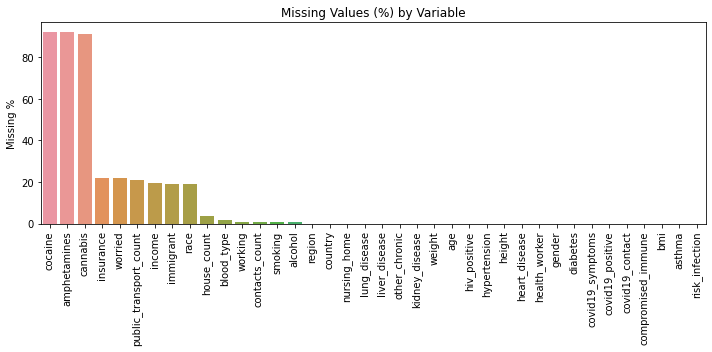


=== Outlier Summary (IQR method) ===


,Outlier Count
hypertension,922
covid19_symptoms,890
covid19_contact,863
asthma,644
contacts_count,520
diabetes,445
health_worker,395
public_transport_count,367
other_chronic,350
alcohol,338


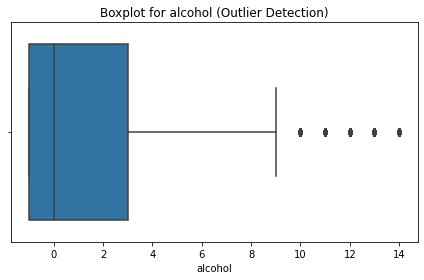

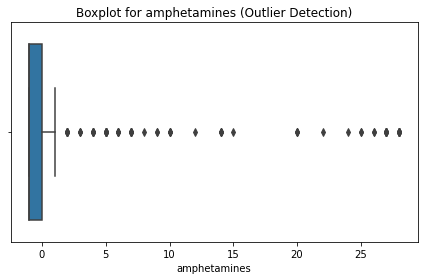

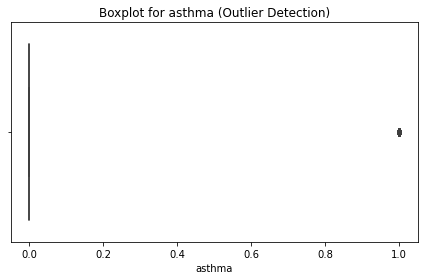

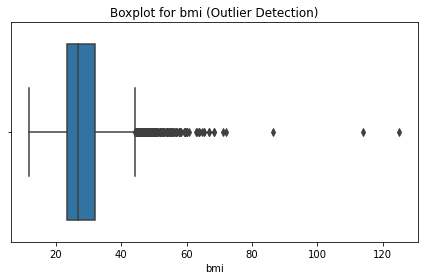

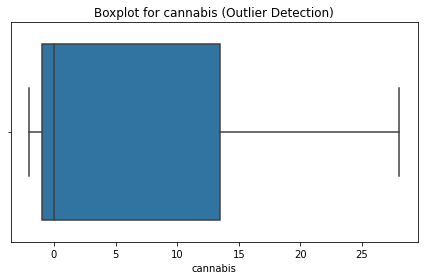

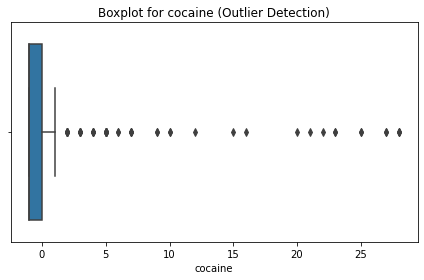

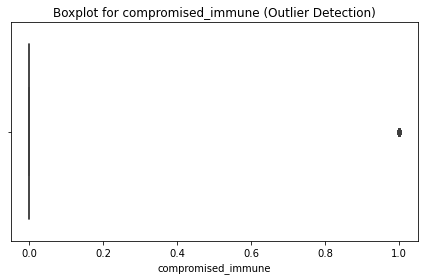

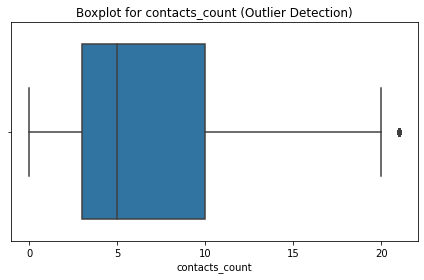

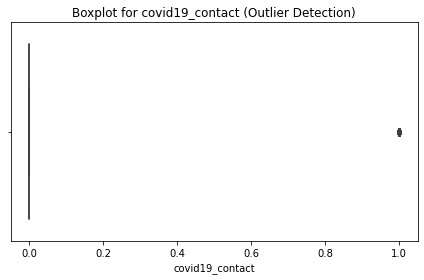

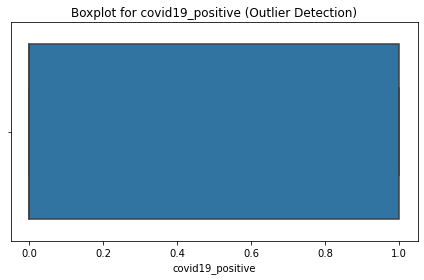

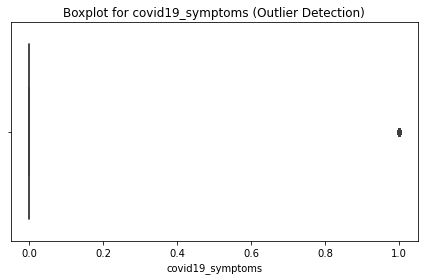

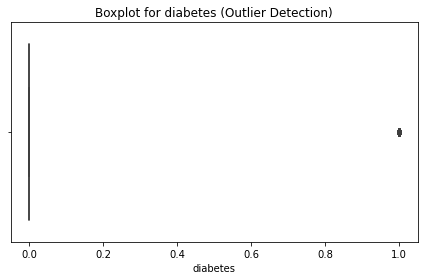

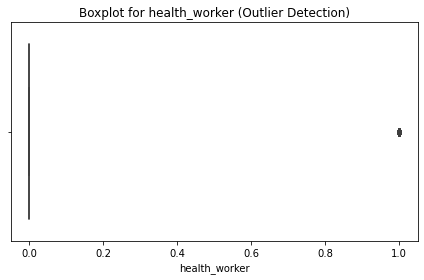

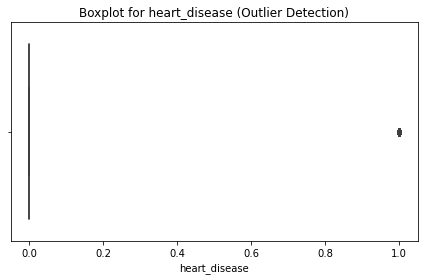

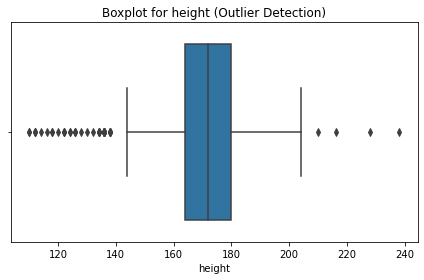

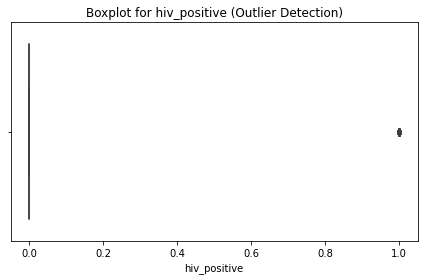

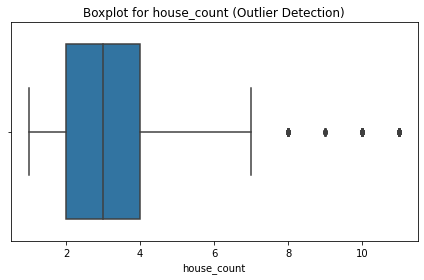

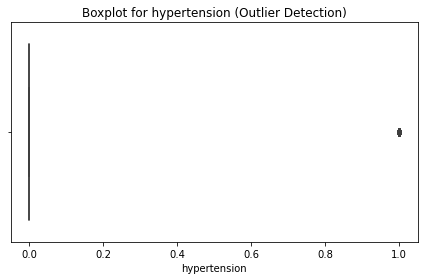

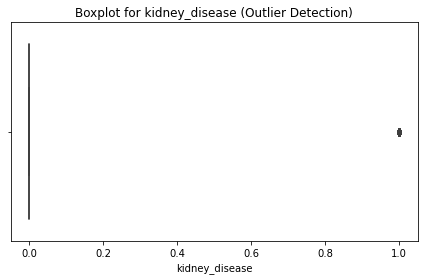

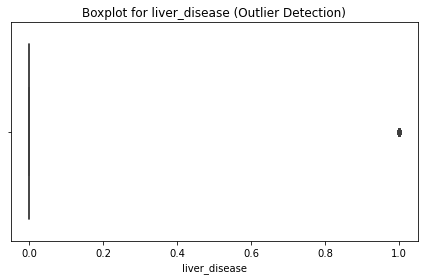

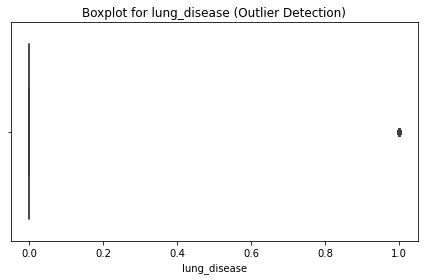

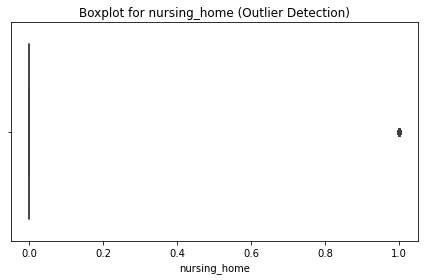

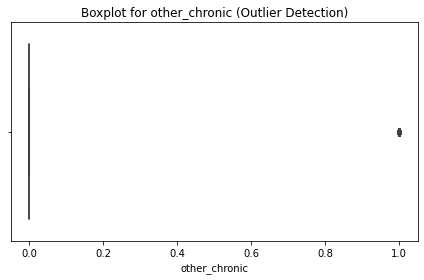

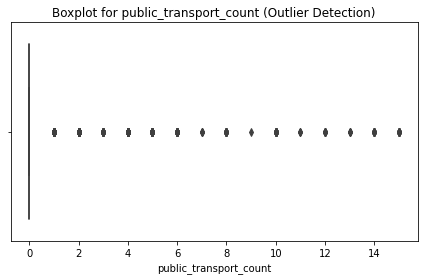

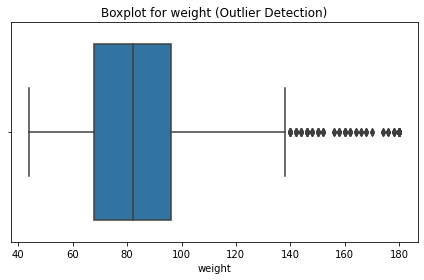

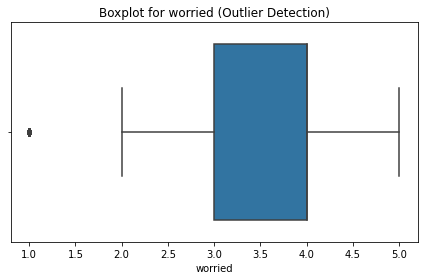

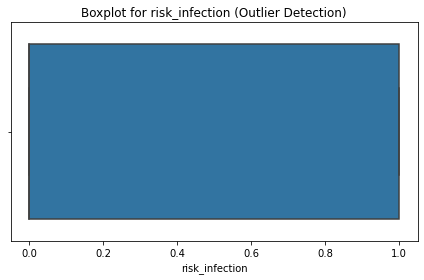


=== Invalid Values (business rules) ===
worried: None
height: None
age: None

=== Duplicate Rows ===
Total duplicates: 0

=== Imputation Plan (draft) ===
alcohol: Median (numeric) / Mode (categorical)
amphetamines: Median (numeric) / Mode (categorical)
blood_type: Median (numeric) / Mode (categorical)
cannabis: Median (numeric) / Mode (categorical)
cocaine: Median (numeric) / Mode (categorical)
contacts_count: Median (numeric) / Mode (categorical)
country: Median (numeric) / Mode (categorical)
house_count: Median (numeric) / Mode (categorical)
immigrant: Median (numeric) / Mode (categorical)
income: Median (numeric) / Mode (categorical)
insurance: Median (numeric) / Mode (categorical)
public_transport_count: Median (numeric) / Mode (categorical)
race: Median (numeric) / Mode (categorical)
region: Median (numeric) / Mode (categorical)
smoking: Median (numeric) / Mode (categorical)
working: Median (numeric) / Mode (categorical)
worried: Median (numeric) / Mode (categorical)
[INFO] Dropp

In [244]:

### Task 1

## Question 3

#Data quality + Cleaning pipeline
# ============================================

import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
from IPython.display import display

# ---------------------------
# 0) Keep only variables from Q2
# ---------------------------
assert "Variable" in variable_catalog.columns and "Role" in variable_catalog.columns, \
    "variable_catalog must have columns ['Variable','Role'] from Q2."

selected_vars = variable_catalog.loc[variable_catalog["Role"] != "Dropped", "Variable"].tolist()
missing_in_df = [c for c in selected_vars if c not in df.columns]
assert len(missing_in_df) == 0, f"These selected variables are not in df: {missing_in_df}"

df_selected = df[selected_vars].copy()
print(f"[Q3] Selected columns for quality checks: {len(selected_vars)} variables")

# ---------------------------
# 1) MISSING VALUES (counts & %)
# ---------------------------
missing_counts  = df_selected.isna().sum()
missing_percent = (df_selected.isna().mean() * 100).round(2)
missing_summary = pd.DataFrame({"Missing Count": missing_counts,
                                "Missing %": missing_percent})\
                    .sort_values(by = "Missing %", ascending = False)

print("\n=== Missing Values Summary ===")
display(missing_summary)

# Bar plot: Missing % by variable
plt.figure(figsize = (10, 5))
sns.barplot(x = missing_summary.index, y = missing_summary["Missing %"])
plt.xticks(rotation = 90)
plt.title("Missing Values (%) by Variable")
plt.tight_layout()
plt.show()

# ---------------------------
# 2) OUTLIERS (numeric only; IQR rule)
# ---------------------------
num_cols = df_selected.select_dtypes(include = [np.number]).columns.tolist()
outlier_summary = {}
for col in num_cols:
    Q1, Q3 = df_selected[col].quantile(0.25), df_selected[col].quantile(0.75)
    IQR = Q3 - Q1
    lower, upper = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR
    outlier_summary[col] = int(((df_selected[col] < lower) | (df_selected[col] > upper)).sum())

outlier_df = (pd.DataFrame.from_dict(outlier_summary, orient = "index", columns = ["Outlier Count"])
                .sort_values("Outlier Count", ascending = False))
print("\n=== Outlier Summary (IQR method) ===")
display(outlier_df)

# Optional: Boxplots for numeric variables
for col in num_cols:
    plt.figure()
    sns.boxplot(x = df_selected[col])
    plt.title(f"Boxplot for {col} (Outlier Detection)")
    plt.tight_layout()
    plt.show()

# ---------------------------
# 3) INVALID VALUES (business rules; case-safe)
#    worried: 1..5 (Likert)
#    height:  50..250 cm
#    age:     0..19 (dataset's "age quantile" 0–19)
# ---------------------------
tmp = df_selected.copy()
tmp.columns = tmp.columns.str.strip().str.lower()

for c in ["worried", "height", "age"]:
    if c in tmp.columns:
        tmp[c] = pd.to_numeric(tmp[c], errors = "coerce")

invalid_checks = {}
rules = {
    "worried": lambda s: s.isin([1, 2, 3, 4, 5]),
    "height":  lambda s: (s >= 50) & (s <= 250),
    "age":     lambda s: (s >= 0) & (s <= 19),
}
for c, valid in rules.items():
    if c in tmp.columns:
        bad_vals = tmp.loc[~valid(tmp[c]), c].dropna().unique().tolist()
        invalid_checks[c] = sorted(bad_vals)

print("\n=== Invalid Values (business rules) ===")
for k, v in invalid_checks.items():
    print(f"{k}: {v if v else 'None'}")

# ---------------------------
# 4) DUPLICATES
# ---------------------------
duplicate_count = df_selected.duplicated().sum()
print(f"\n=== Duplicate Rows ===\nTotal duplicates: {duplicate_count}")

# ---------------------------
# 5) IMPUTATION PLAN (draft; not applied here)
# ---------------------------
imputation_plan = {}
for col in df_selected.columns:
    if df_selected[col].isna().sum() > 0:
        imputation_plan[col] = "Median (numeric) / Mode (categorical)"
print("\n=== Imputation Plan (draft) ===")
for var, method in imputation_plan.items():
    print(f"{var}: {method}")

# ============================================================
# 6) Create df_clean from df_selected (apply rules + robust imputation)
# ============================================================
df_clean = df_selected.copy()

# Normalize column names (lowercase) for consistent rule checks
df_clean.columns = df_clean.columns.str.strip().str.lower()

# Coerce key rule columns to numeric before comparisons
for c in ["worried", "height", "age"]:
    if c in df_clean.columns:
        df_clean[c] = pd.to_numeric(df_clean[c], errors = "coerce")

# Enforce business rules → set invalid values to NaN
if "worried" in df_clean.columns:
    df_clean.loc[~df_clean["worried"].isin([1, 2, 3, 4, 5]), "worried"] = np.nan
if "height" in df_clean.columns:
    df_clean.loc[(df_clean["height"] < 50) | (df_clean["height"] > 250), "height"] = np.nan
if "age" in df_clean.columns:
    df_clean.loc[(df_clean["age"] < 0) | (df_clean["age"] > 19), "age"] = np.nan

# First-pass imputation (median for numeric, mode for categorical)
num_cols_clean = df_clean.select_dtypes(include=[np.number]).columns.tolist()
for col in df_clean.columns:
    if df_clean[col].isna().sum() > 0:
        if col in num_cols_clean:
            med = df_clean[col].median()
            if pd.notna(med):
                df_clean[col] = df_clean[col].fillna(med)
        else:
            mode_vals = df_clean[col].mode(dropna = True)
            if not mode_vals.empty:
                df_clean[col] = df_clean[col].fillna(mode_vals.iloc[0])

# --- Hardening step: ensure no NaN/±inf remain (handles all-NaN columns, empty mode, etc.)
df_clean = df_clean.replace([np.inf, -np.inf], np.nan)

# Drop columns that are all-NaN (rare but fatal later)
all_nan_cols = df_clean.columns[df_clean.isna().all()]
if len(all_nan_cols) > 0:
    print("[INFO] Dropping all-NaN columns:", list(all_nan_cols))
    df_clean = df_clean.drop(columns = all_nan_cols)

# Robust second-pass imputation with fallback values
for col in df_clean.columns:
    if pd.api.types.is_numeric_dtype(df_clean[col]):
        med = df_clean[col].median()
        df_clean[col] = df_clean[col].fillna(0 if pd.isna(med) else med)
    else:
        mode_vals = df_clean[col].mode(dropna = True)
        fill_val = mode_vals.iloc[0] if not mode_vals.empty else "Unknown"
        df_clean[col] = df_clean[col].fillna(fill_val)

# Remove exact duplicate rows (post-imputation)
before = df_clean.shape[0]
df_clean = df_clean.drop_duplicates()
after = df_clean.shape[0]
print(f"\n[Q3] df_clean shape: {df_clean.shape[0]} rows x {df_clean.shape[1]} cols "
      f"(dropped {before - after} duplicate rows)")

# Final guard: no NaN/±inf allowed
df_clean = df_clean.replace([np.inf, -np.inf], np.nan)
assert df_clean.isna().sum().sum() == 0, "There are still NaNs in df_clean!"
print("[OK] df_clean is finite (no NaN/inf).")
df_clean.to_csv("df_clean_q3.csv", index = False)

# ============================================================
# 7) OPTIONAL: Feature standardisation/grouping → df_model_ready
#    (keeps modelling-friendly categories; avoids sparse/rare levels)
# ============================================================
df_feat = df_clean.copy()  # already lowercase columns

# Smoking → Never / Former / Current / Other
def map_smoking(x):
    if pd.isna(x): return np.nan
    x = str(x).strip().lower()
    if x == "never": return "Never"
    if x.startswith("quit"): return "Former"
    if x.startswith("yes"):  return "Current"
    return "Other"

if "smoking" in df_feat.columns:
    df_feat["smoking"] = df_feat["smoking"].map(map_smoking)

# Substances → None / Occasional / Regular
def bucket3(x):
    if pd.isna(x): return np.nan
    x = str(x).strip().lower()
    if x in {"none","never","no"}: return "None"
    if x in {"rare","light","occasional","sometimes"}: return "Occasional"
    return "Regular"

for c in ["alcohol", "cannabis", "amphetamines", "cocaine"]:
    if c in df_feat.columns:
        df_feat[c] = df_feat[c].map(bucket3)

# Country → Top-K + Other
def top_k_or_other(s: pd.Series, k = 10):
    vc = s.value_counts(dropna = True)
    top = set(vc.nlargest(k).index)
    return s.where(s.isin(top), "Other")

if "country" in df_feat.columns:
    df_feat["country"] = top_k_or_other(df_feat["country"], k=10)

# Working → harmonised labels
if "working" in df_feat.columns:
    m = {"full-time":"Employed", "part-time":"Employed", "employed":"Employed",
         "student":"Student", "unemployed":"Unemployed", "retired":"Retired"}
    df_feat["working"] = df_feat["working"].astype(str).str.lower().map(m).fillna("Other")

# Race → Top-8 + Other
if "race" in df_feat.columns:
    df_feat["race"] = top_k_or_other(df_feat["race"], k=8)

# Redundancy: if BMI + height + weight exist, drop raw height/weight
drop_cols = []
for trio in [["bmi","height","weight"]]:
    if all(c in df_feat.columns for c in trio):
        drop_cols += ["height","weight"]

df_model_ready = df_feat.drop(columns=drop_cols, errors = "ignore").copy()

# Ensure df_model_ready has no NaN/±inf after mappings
df_model_ready = df_model_ready.replace([np.inf, -np.inf], np.nan)
obj_cols = df_model_ready.select_dtypes(include = "object").columns
num_cols_mr = df_model_ready.select_dtypes(include = [np.number]).columns

if len(obj_cols) > 0:
    df_model_ready[obj_cols] = df_model_ready[obj_cols].fillna("Unknown")

for c in num_cols_mr:
    if df_model_ready[c].isna().any():
        med = df_model_ready[c].median()
        df_model_ready[c] = df_model_ready[c].fillna(0 if pd.isna(med) else med)

assert df_model_ready.isna().sum().sum() == 0, "NaNs remain in df_model_ready!"
df_model_ready.to_csv("df_model_ready_q3.csv", index=False)

print("\nSaved: df_clean_q3.csv, df_model_ready_q3.csv")

# ---------------------------
# 8) Save Q3 summaries for the report
# ---------------------------
missing_summary.to_csv("q3_missing_summary.csv")
outlier_df.to_csv("q3_outlier_summary.csv")
(pd.Series(imputation_plan, name="Imputation Method")
  .to_frame().to_csv("q3_imputation_plan.csv"))

decision_log_q3 = pd.DataFrame({
    "Date": [pd.Timestamp.today().strftime("%Y-%m-%d")],
    "Decision": ["Checked missing/outlier/invalid/duplicates; enforced rules; robust imputation"],
    "Reason": ["Guarantee finite inputs for modelling; median for numeric; mode for categorical; fallbacks for edge cases"]
})
decision_log_q3.to_csv("decision_log_q3.csv", index = False)

print("Also saved: q3_missing_summary.csv, q3_outlier_summary.csv, q3_imputation_plan.csv, decision_log_q3.csv")



## Task 1
### Q4

In [245]:
### Task 1

## Question 4

# Target distribution AFTER preprocessing
# =========================

import numpy as np, pandas as pd

# 1) choose right DataFrame after preprocessing
base_df_name = "df_model_ready" if "df_model_ready" in globals() else "df_clean"
base_df = globals()[base_df_name].copy()

# 2) safe
assert "risk_infection" in base_df.columns, "Target 'risk_infection' not found."
base_df["risk_infection"] = pd.to_numeric(base_df["risk_infection"], errors="coerce")

# 3) count and propotion
q4_counts = base_df["risk_infection"].value_counts().sort_index()
q4_props  = (base_df["risk_infection"].value_counts(normalize=True) * 100).round(2).sort_index()

print(f"\n=== Q4: Target distribution AFTER preprocessing ({base_df_name}) ===")
print(q4_counts)
print(q4_props)

# 4) save and put into report
q4_counts.to_csv("q4_target_counts_after_preproc.csv")
q4_props.to_csv("q4_target_props_after_preproc.csv")

print("\nNote: Compare to Q1 (raw). If the percentages shifted, explain (e.g., invalids -> NaN -> imputation, duplicates dropped).")



=== Q4: Target distribution AFTER preprocessing (df_model_ready) ===
0.0    2536
1.0    2464
Name: risk_infection, dtype: int64
0.0    50.72
1.0    49.28
Name: risk_infection, dtype: float64

Note: Compare to Q1 (raw). If the percentages shifted, explain (e.g., invalids -> NaN -> imputation, duplicates dropped).


## Task 1
### Q5

In [246]:
# Train/Test split with stratification + save CSVs
# =========================
from sklearn.model_selection import train_test_split

# 1) Define features (X) and target (y)
#    Note: keep *all* cleaned inputs; encoding/scale for models will happen in Tasks 2–4.
X = df_clean.drop(columns=["risk_infection"])
y = df_clean["risk_infection"].astype(int)  # ensure integer labels 0/1

# 2) 70/30 split with stratification to preserve class balance
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.20,         # change to 0.20 if your team chose 80/20
    stratify=y,             # keep class proportions in both sets
    random_state=42         # reproducibility
)

# 3) Recombine X & y for saving
train_set = X_train.copy()
train_set["risk_infection"] = y_train
test_set = X_test.copy()
test_set["risk_infection"] = y_test

# 4) Save for later modeling (Tasks 2–4)
train_set.to_csv("train_set.csv", index=False)
test_set.to_csv("test_set.csv", index=False)

# 5) Report sizes and target proportions to prove stratification worked
print(f"\n=== Q5: Split summary ===")
print(f"Train set shape: {train_set.shape} | Test set shape: {test_set.shape}")

print("\nTarget proportion in TRAIN:")
print(y_train.value_counts(normalize = True).round(3))

print("\nTarget proportion in TEST:")
print(y_test.value_counts(normalize = True).round(3))



=== Q5: Split summary ===
Train set shape: (4000, 37) | Test set shape: (1000, 37)

Target proportion in TRAIN:
0    0.507
1    0.493
Name: risk_infection, dtype: float64

Target proportion in TEST:
0    0.507
1    0.493
Name: risk_infection, dtype: float64


## Task 2
### Q1


=== Q1.a) Parameters used (Default DT) ===
{'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'random_state': 42, 'splitter': 'best'}

=== Q1.b) Classification accuracy (Train/Test) ===
Train Accuracy: 1.000
Test  Accuracy: 0.997

=== Q1.c) Tree size ===
Nodes: 51 | Rules (leaves): 26

=== Q1.d) First & second split variables ===
First split: covid19_positive
Second splits: ['covid19_contact', None]

=== Q1.e) Top-5 important variables (aggregated to original) ===
covid19_positive: 0.7424
covid19_contact: 0.1522
covid19_symptoms: 0.0718
working: 0.0080
nursing_home: 0.0068

=== Q1.f) Overfitting evidence ===
Train–Test accuracy gap: +0.003  --> No strong overfitting signal.
Saved dt_default_graphviz.png


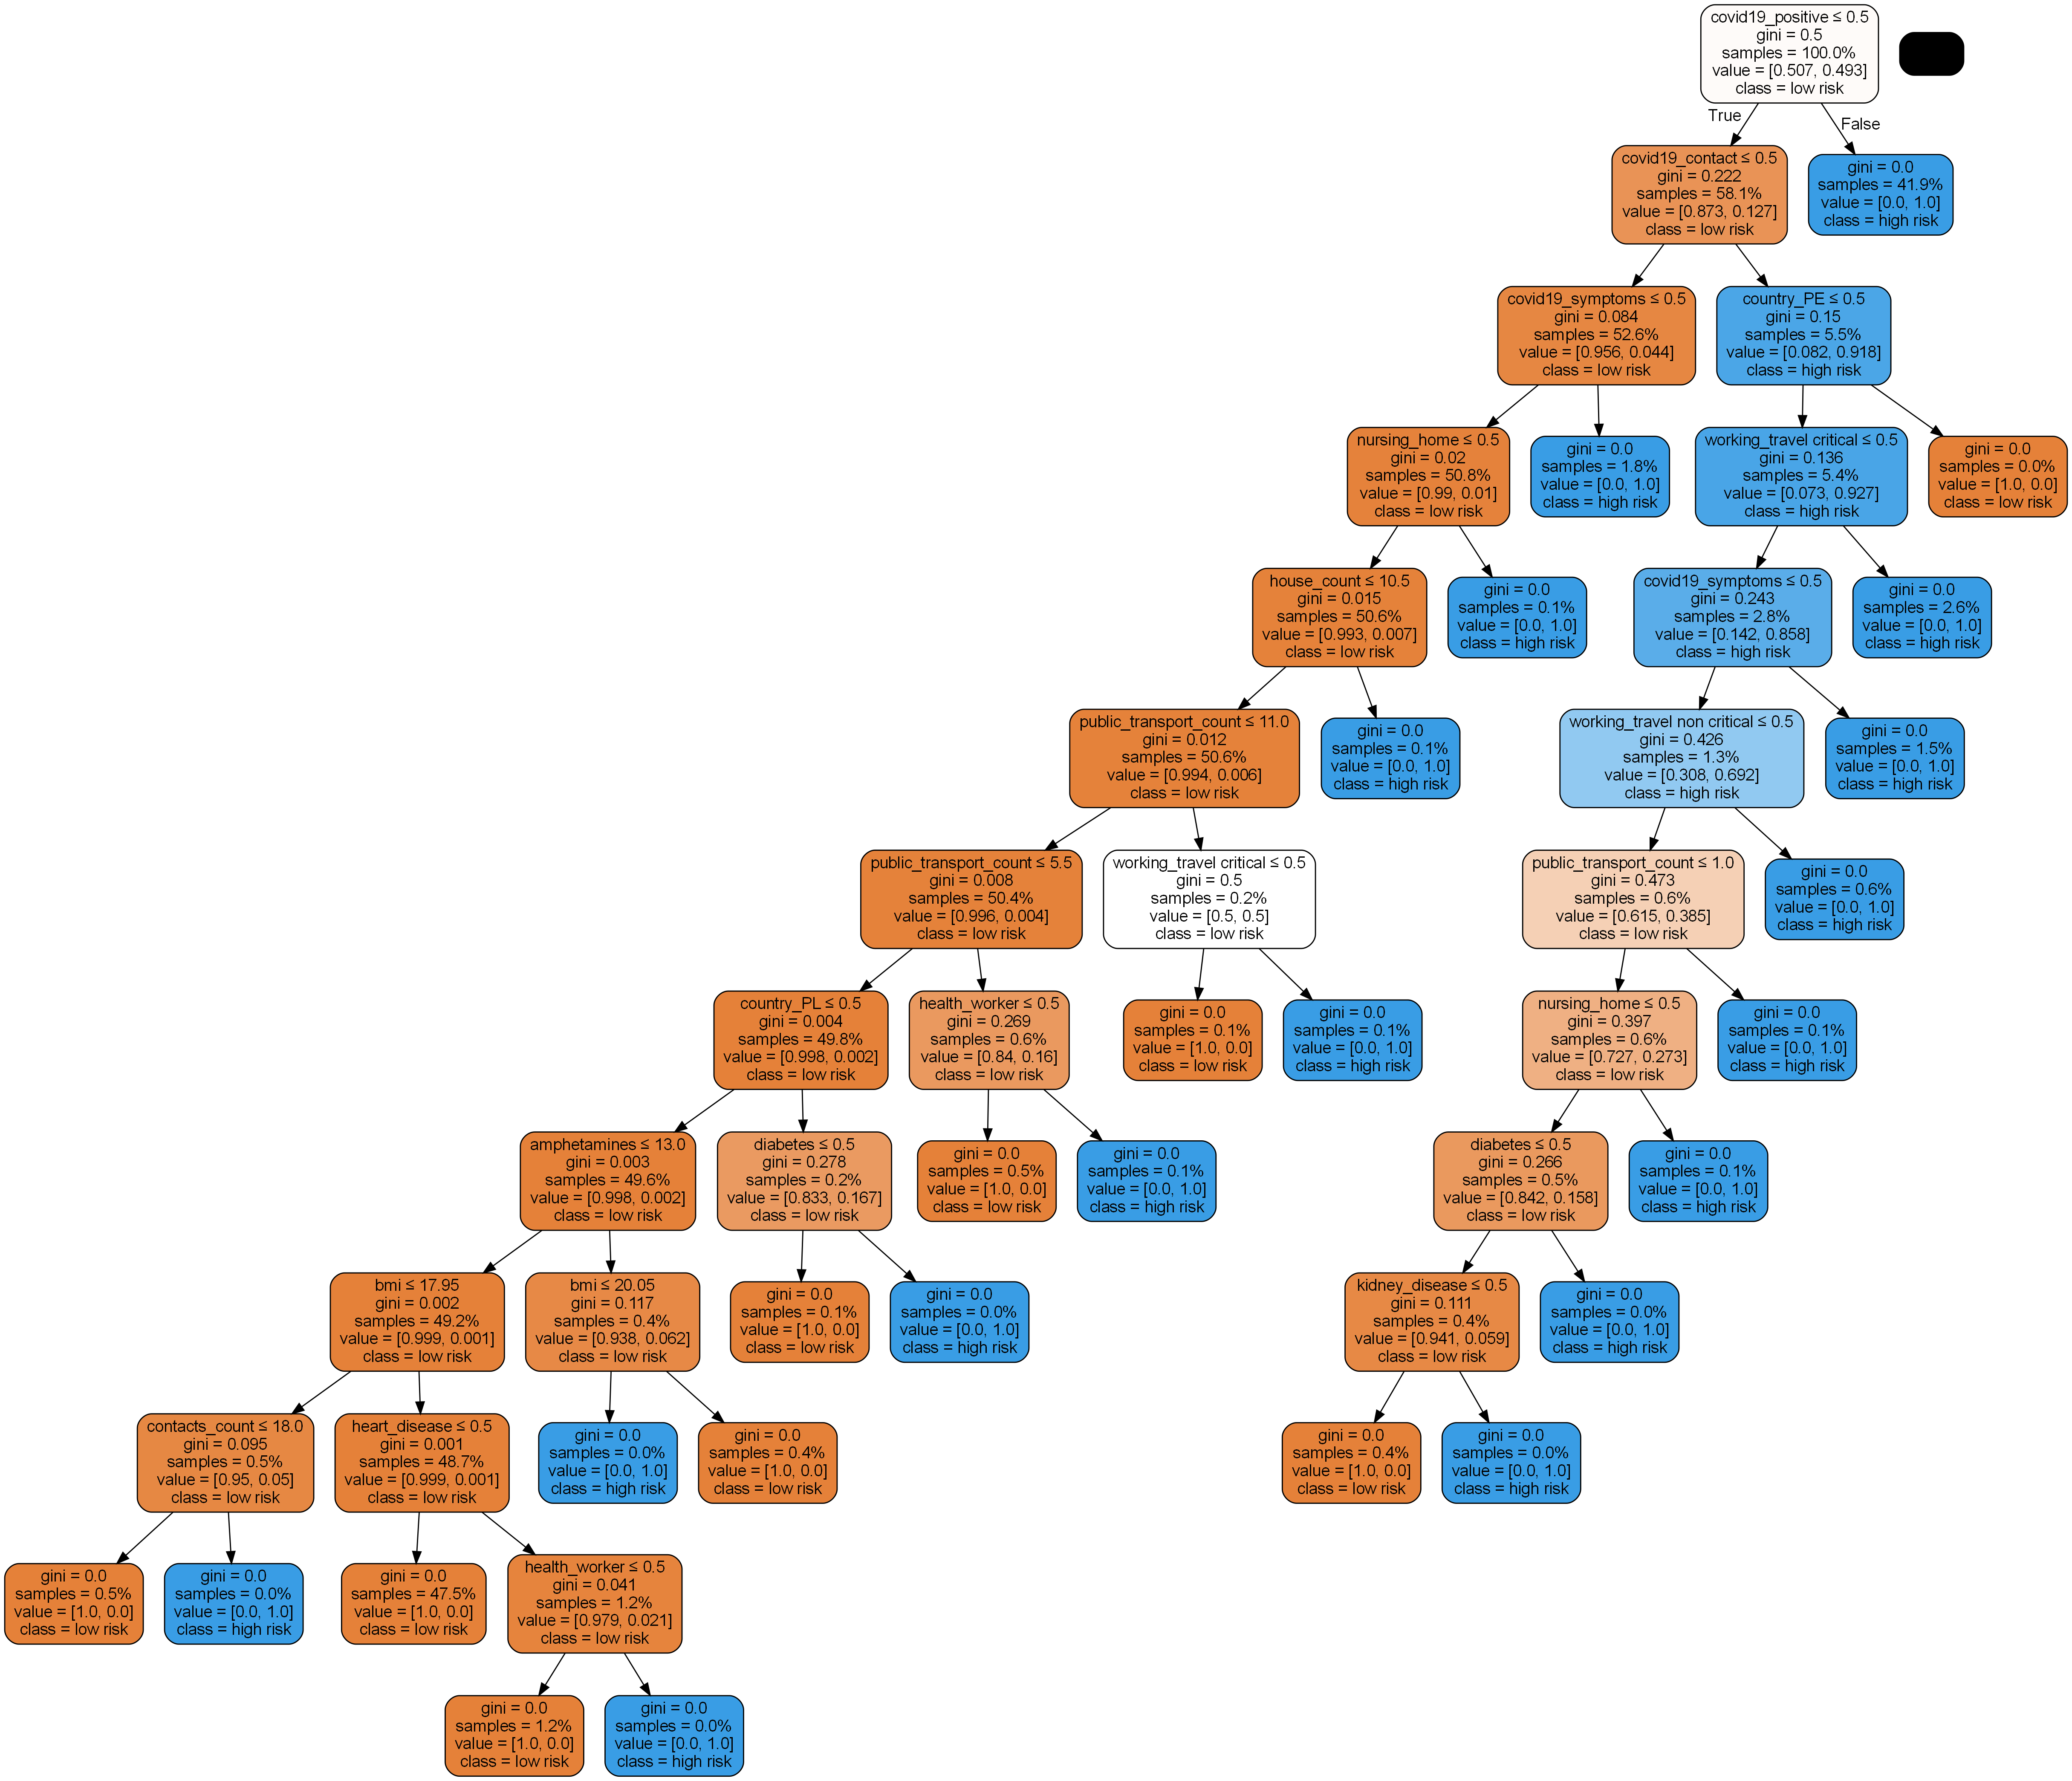

In [247]:
### Task 2

## Question 1
# ============================================
# Decision Tree (Default Settings)
# ============================================

import os, numpy as np, pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# ===== Graphviz export: Default DT =====
from io import StringIO
from sklearn.tree import export_graphviz
import pydot
from IPython.display import Image, display

# ---------- 0) Load the Q5 splits ----------
if os.path.exists("train_set.csv") and os.path.exists("test_set.csv"):
    train_set = pd.read_csv("train_set.csv")
    test_set  = pd.read_csv("test_set.csv")
else:
    raise FileNotFoundError("Missing train_set.csv / test_set.csv. Run Task 1 – Q5 first.")

# Separate features/target
y_train = train_set["risk_infection"].astype(int)
X_train_raw = train_set.drop(columns=["risk_infection"])
y_test  = test_set["risk_infection"].astype(int)
X_test_raw  = test_set.drop(columns=["risk_infection"])

# ---------- 1) Encode categoricals with pandas.get_dummies ----------
# get_dummies only encodes non-numeric columns; numerics pass through
X_train = pd.get_dummies(X_train_raw, drop_first=True)
X_test  = pd.get_dummies(X_test_raw,  drop_first=True)

# Align test columns to training columns (unseen categories in test -> zeros)
X_test = X_test.reindex(columns=X_train.columns, fill_value=0) ##

# Keep lists for later interpretation
numeric_cols = X_train_raw.select_dtypes(include=[np.number]).columns.tolist() ##
cat_cols     = [c for c in X_train_raw.columns if c not in numeric_cols] ##
encoded_feature_names = X_train.columns.tolist() ##

def collapse_to_original(encoded_name: str) -> str:
    """
    Map a dummy column back to its original feature name.
    Example: 'gender_Male' -> 'gender'
             'height' (numeric passthrough) -> 'height'
    """
    if encoded_name in numeric_cols:
        return encoded_name
    for c in cat_cols:
        if encoded_name.startswith(f"{c}_"):
            return c
    return encoded_name  # fallback ##

# ---------- 2) Train default Decision Tree ----------
dt = DecisionTreeClassifier(random_state = 42)  # default hyperparameters
dt.fit(X_train, y_train)

# ---------- 3) (b) Accuracy on train/test ----------
y_pred_tr = dt.predict(X_train)
y_pred_te = dt.predict(X_test)
acc_tr = accuracy_score(y_train, y_pred_tr)
acc_te = accuracy_score(y_test,  y_pred_te)

# ---------- 4) (c) Tree size: nodes & leaves (≈ rules) ----------
tree = dt.tree_
node_count = tree.node_count
leaf_count = int(np.sum(tree.children_left == -1))  # leaves ~ rules

# ---------- 5) (d) First split and second-level splits ----------
feat_index = tree.feature  # index into encoded_feature_names; -2 for leaves

def name_by_index(idx):
    return encoded_feature_names[idx] if idx >= 0 else None

# First split (root)
first_idx = feat_index[0]
first_name_enc = name_by_index(first_idx)
first_split_orig = collapse_to_original(first_name_enc) if first_name_enc else None ##

# Second-level splits: children of root
children_left, children_right = tree.children_left, tree.children_right
second_vars = []
for child in (children_left[0], children_right[0]):
    if child != -1:
        idx = feat_index[child]
        name_enc = name_by_index(idx)
        second_vars.append(collapse_to_original(name_enc) if name_enc else None)

# ---------- 6) (e) Top-5 important variables (aggregate dummies to original) ----------
raw_imps = dt.feature_importances_ 
agg = {} ##
for enc_name, imp in zip(encoded_feature_names, raw_imps): 
    base = collapse_to_original(enc_name) 
    agg[base] = agg.get(base, 0.0) + float(imp) 
top5 = sorted(agg.items(), key=lambda x: x[1], reverse=True)[:5] 

# ---------- 7) (a) Parameters actually used (defaults shown) ----------
used_params = {k: v for k, v in dt.get_params().items() 
               if k in ["criterion","splitter","max_depth","min_samples_split", 
                        "min_samples_leaf","max_features","class_weight","random_state"]} 

# ---------- 8) (f) Overfitting evidence ----------
gap = acc_tr - acc_te
overfit_note = "Potential overfitting if gap is large (e.g., > 0.05)" if abs(gap) > 0.05 else "No strong overfitting signal."

# ---------- 9) Print all requested outputs ----------
print("\n=== Q1.a) Parameters used (Default DT) ===")
print(used_params)

print("\n=== Q1.b) Classification accuracy (Train/Test) ===")
print(f"Train Accuracy: {acc_tr:.3f}")
print(f"Test  Accuracy: {acc_te:.3f}")

print("\n=== Q1.c) Tree size ===")
print(f"Nodes: {node_count} | Rules (leaves): {leaf_count}")

print("\n=== Q1.d) First & second split variables ===")
print(f"First split: {first_split_orig}")
print(f"Second splits: {second_vars}")

print("\n=== Q1.e) Top-5 important variables (aggregated to original) ===")
for v, s in top5:
    print(f"{v}: {s:.4f}")

print("\n=== Q1.f) Overfitting evidence ===")
print(f"Train–Test accuracy gap: {gap:+.3f}  --> {overfit_note}")


def export_tree_graphviz(model, X, filename, class_names=("low risk","high risk")): 
    dot = StringIO()
    export_graphviz(
        model,
        out_file = dot, 
        feature_names = list(X.columns), 
        class_names = list(class_names), 
        filled=True, rounded = True, proportion = True, 
        special_characters = True
    )
    (graph,) = pydot.graph_from_dot_data(dot.getvalue()) 
    # Optional: higher DPI (clearer)
    graph.set("dpi", "200")
    graph.write_png(filename)
    print(f"Saved {filename}") ##

# Use the trained model `dt` from Q1 and the encoded matrix `X_train`
export_tree_graphviz(dt, X_train, "dt_default_graphviz.png")
display(Image("dt_default_graphviz.png"))



## Task 2
### Q2


=== Q2.a) Optimal parameters (GridSearchCV) ===
{'criterion': 'entropy', 'max_depth': 6, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 20}
Mean CV accuracy of best model: 0.995

=== Q2.b) Classification accuracy (Train/Test) ===
Train Accuracy: 0.997
Test  Accuracy: 0.995

=== Q2.c) Size of the chosen tree ===
Nodes: 25 | Rules (leaves): 13

=== Q2.d) First & second split variables ===
First split: covid19_positive
Second splits: ['covid19_contact', None]

=== Q2.e) Top-5 important variables (in order, aggregated) ===
covid19_positive: 0.6931
covid19_contact: 0.1619
covid19_symptoms: 0.1043
public_transport_count: 0.0137
working: 0.0105

=== Q2.f) Evidence of overfitting ===
Train–Test accuracy gap: +0.002  --> No strong overfitting signal.
Saved dt_tuned_graphviz.png


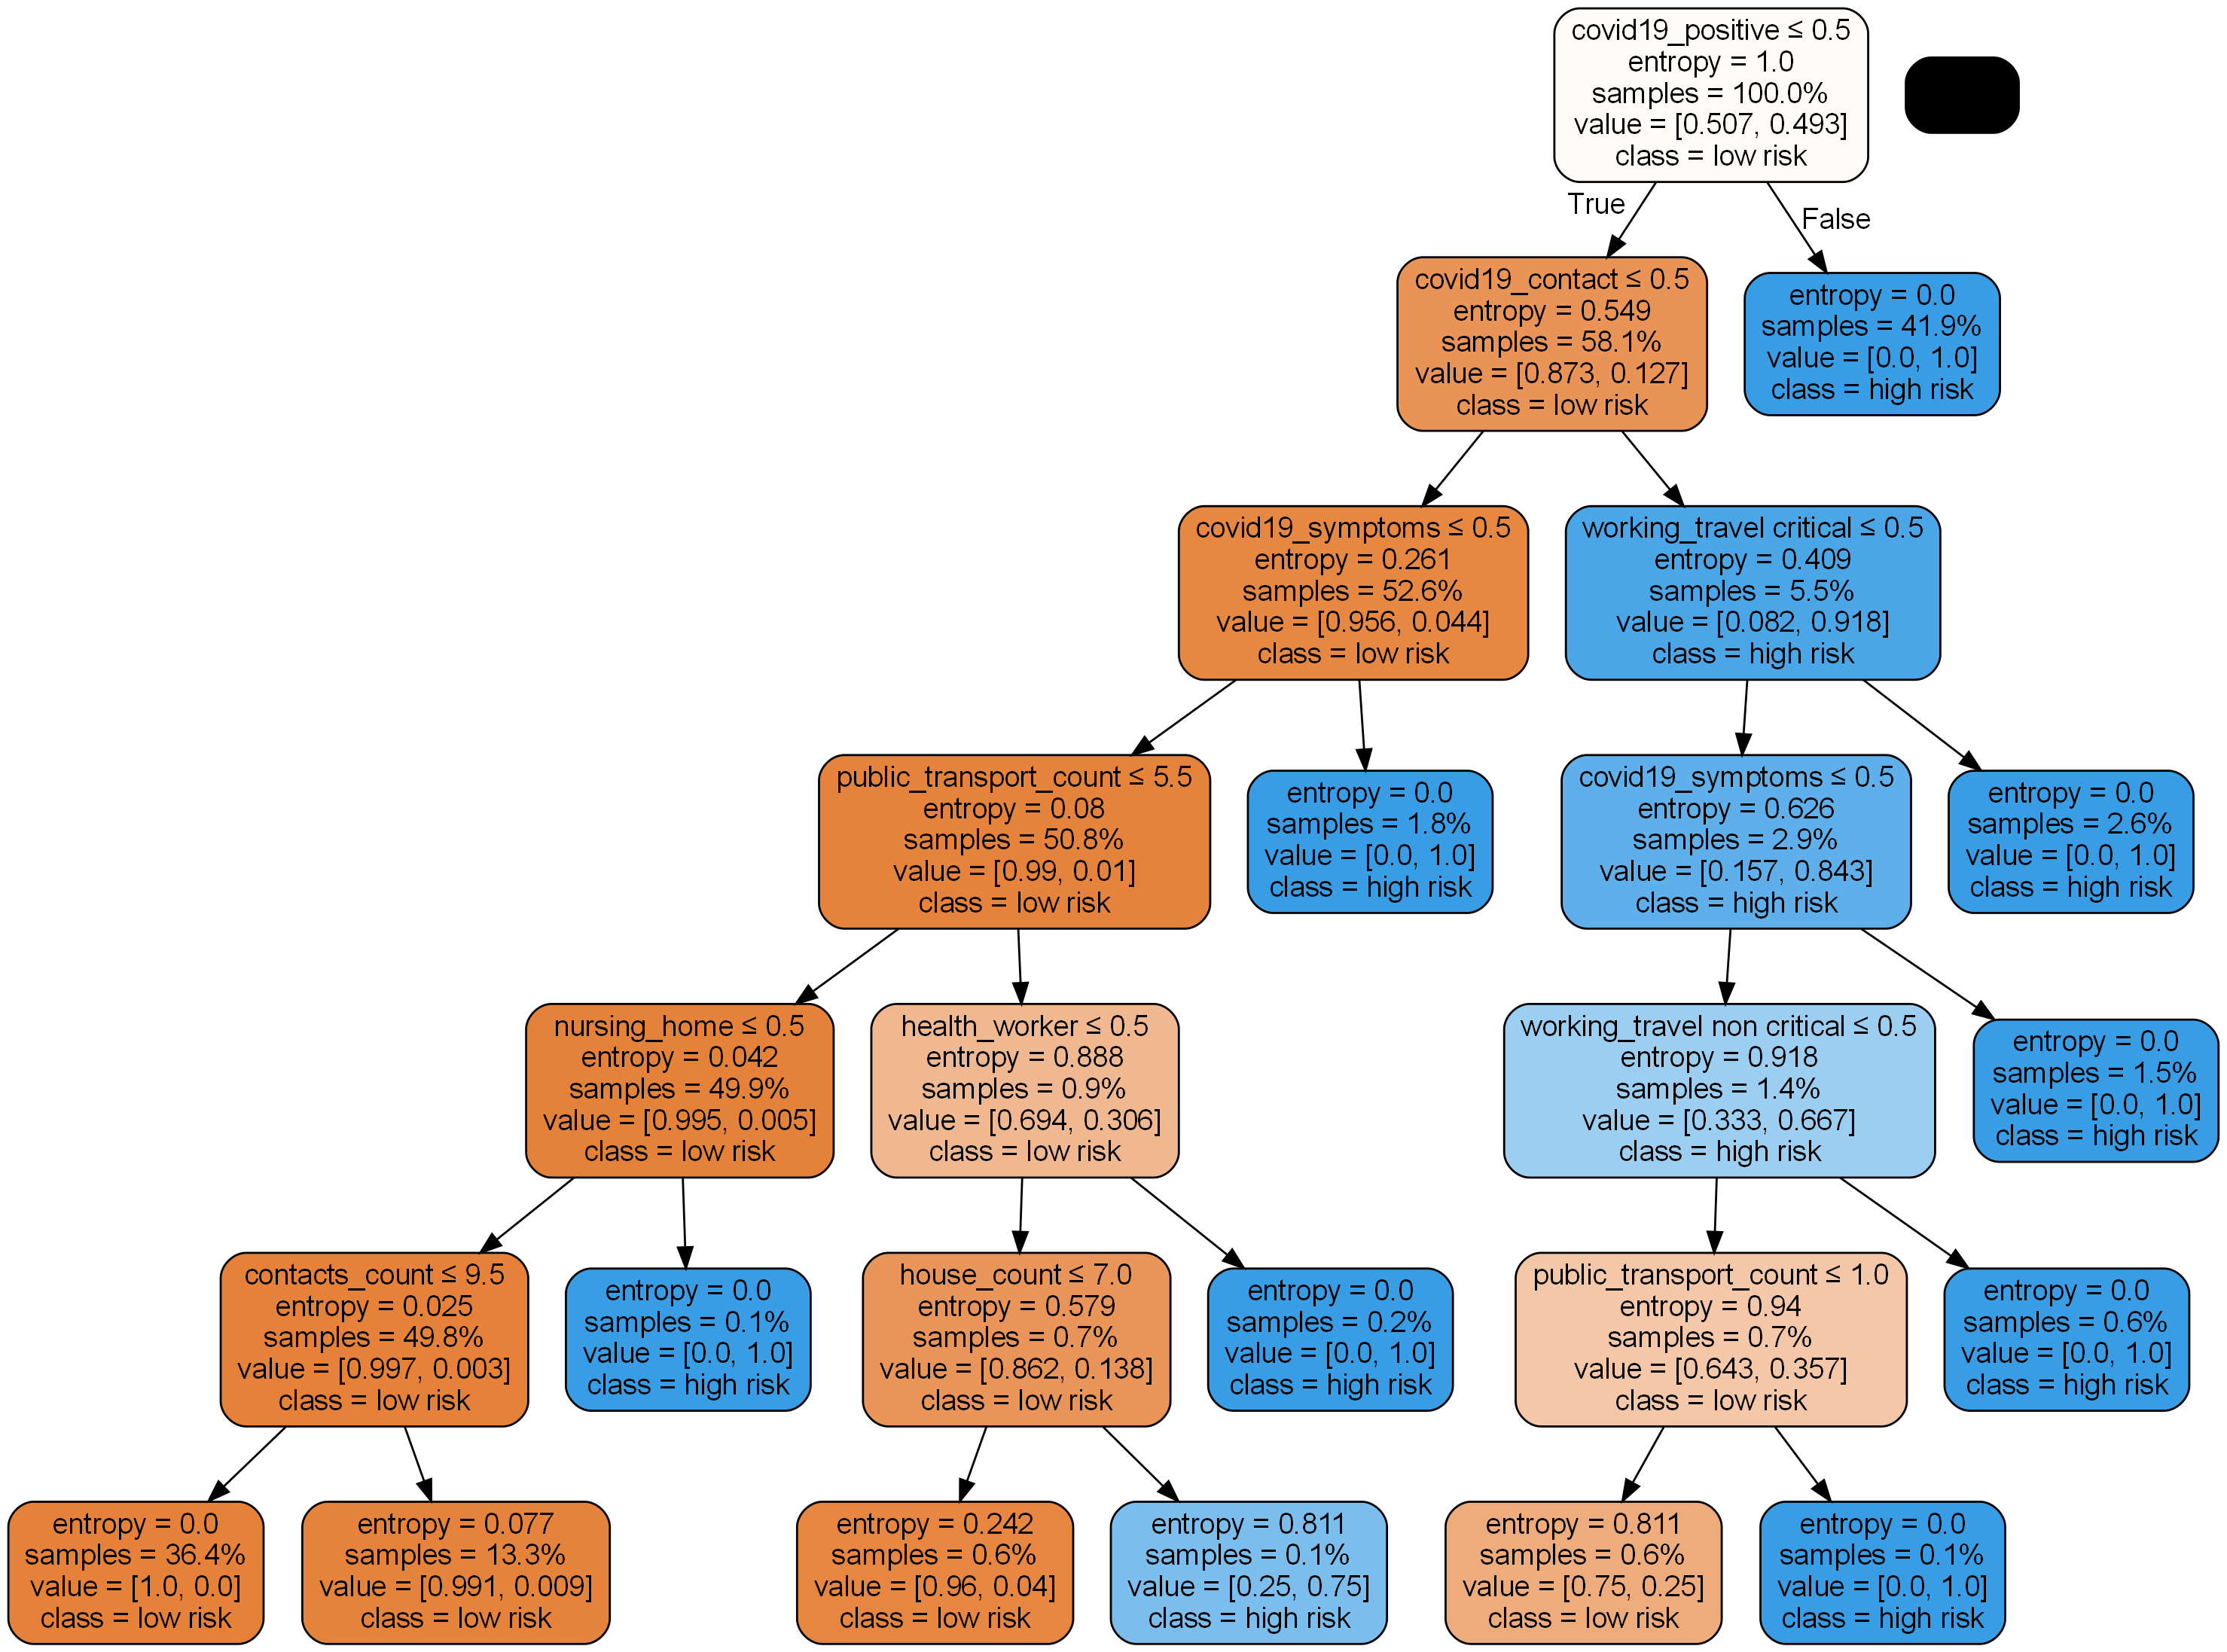

In [248]:
# ============================================
# Tuned Decision Tree (GridSearchCV)
# ============================================

import os, numpy as np, pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score


# ===== Graphviz export: Tuned DT (place at end of Q2) =====
from io import StringIO
from sklearn.tree import export_graphviz
import pydot
from IPython.display import Image, display

# ---------- 0) Load the Q5 splits ----------
if os.path.exists("train_set.csv") and os.path.exists("test_set.csv"):
    train_set = pd.read_csv("train_set.csv")
    test_set  = pd.read_csv("test_set.csv")
else:
    raise FileNotFoundError("Missing train_set.csv / test_set.csv. Run Task 1 – Q5 first.")

# Separate features/target
y_train = train_set["risk_infection"].astype(int)
X_train_raw = train_set.drop(columns=["risk_infection"])
y_test  = test_set["risk_infection"].astype(int)
X_test_raw  = test_set.drop(columns=["risk_infection"])

# ---------- 1) Encode categoricals with pandas.get_dummies ----------
X_train = pd.get_dummies(X_train_raw, drop_first=True)
X_test  = pd.get_dummies(X_test_raw,  drop_first=True)
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

# Keep names for interpretation
numeric_cols = X_train_raw.select_dtypes(include=[np.number]).columns.tolist()
cat_cols     = [c for c in X_train_raw.columns if c not in numeric_cols]
encoded_feature_names = X_train.columns.tolist()

def collapse_to_original(encoded_name: str) -> str:
    """Map dummy back to original column (e.g., 'gender_Male' -> 'gender')."""
    if encoded_name in numeric_cols:
        return encoded_name
    for c in cat_cols:
        if encoded_name.startswith(f"{c}_"):
            return c
    return encoded_name

# ---------- 2) GridSearchCV setup ----------
# Note: if your sklearn >= 1.1 you can add "log_loss" into criterion.
param_grid = {
    "criterion": ["gini", "entropy"],
    "max_depth": [None, 4, 6, 8, 10, 12],
    "min_samples_split": [2, 5, 10, 20],
    "min_samples_leaf": [1, 2, 5, 10],
    "max_features": [None, "sqrt", "log2"]
}
cv = StratifiedKFold(n_splits = 5, shuffle = True, random_state=42)

grid = GridSearchCV(
    estimator = DecisionTreeClassifier(random_state = 42),
    param_grid = param_grid,
    scoring = "accuracy",   # keep consistent with rubric's "classification accuracy"
    cv = cv,
    n_jobs = -1,
    refit = True,
    verbose = 0
)

# ---------- 3) Run search & get best model ----------
grid.fit(X_train, y_train)
dt_tuned = grid.best_estimator_

# ---------- 4) Evaluate tuned model ----------
y_pred_tr = dt_tuned.predict(X_train)
y_pred_te = dt_tuned.predict(X_test)
acc_tr = accuracy_score(y_train, y_pred_tr)
acc_te = accuracy_score(y_test,  y_pred_te)

tree = dt_tuned.tree_
node_count = tree.node_count
leaf_count = int(np.sum(tree.children_left == -1))

feat_index = tree.feature  # indices into encoded_feature_names; -2 for leaves
def name_by_index(idx):
    return encoded_feature_names[idx] if idx >= 0 else None

# First split (root)
first_idx = feat_index[0]
first_name_enc = name_by_index(first_idx)
first_split_orig = collapse_to_original(first_name_enc) if first_name_enc else None

# Second-level splits
children_left, children_right = tree.children_left, tree.children_right
second_vars = []
for child in (children_left[0], children_right[0]):
    if child != -1:
        idx = feat_index[child]
        name_enc = name_by_index(idx)
        second_vars.append(collapse_to_original(name_enc) if name_enc else None)

# Top-5 important variables (aggregate dummies -> original)
raw_imps = dt_tuned.feature_importances_
agg = {}
for enc_name, imp in zip(encoded_feature_names, raw_imps):
    base = collapse_to_original(enc_name)
    agg[base] = agg.get(base, 0.0) + float(imp)
top5 = sorted(agg.items(), key = lambda x: x[1], reverse=True)[:5]

# ---------- 5) Print answers (a)–(f) ----------
print("\n=== Q2.a) Optimal parameters (GridSearchCV) ===")
print(grid.best_params_)
print(f"Mean CV accuracy of best model: {grid.best_score_:.3f}")

print("\n=== Q2.b) Classification accuracy (Train/Test) ===")
print(f"Train Accuracy: {acc_tr:.3f}")
print(f"Test  Accuracy: {acc_te:.3f}")

print("\n=== Q2.c) Size of the chosen tree ===")
print(f"Nodes: {node_count} | Rules (leaves): {leaf_count}")

print("\n=== Q2.d) First & second split variables ===")
print(f"First split: {first_split_orig}")
print(f"Second splits: {second_vars}")

print("\n=== Q2.e) Top-5 important variables (in order, aggregated) ===")
for v, s in top5:
    print(f"{v}: {s:.4f}")

print("\n=== Q2.f) Evidence of overfitting ===")
gap = acc_tr - acc_te
print(f"Train–Test accuracy gap: {gap:+.3f}  --> "
      f"{'Potential overfitting if gap is large (e.g., >0.05)' if abs(gap) > 0.05 else 'No strong overfitting signal.'}")

export_tree_graphviz(dt_tuned, X_train, "dt_tuned_graphviz.png")
display(Image("dt_tuned_graphviz.png"))


## Task 2
### Q3

DT Default  - Test ROC-AUC: 0.9970
DT Tuned    - Test ROC-AUC: 0.9993


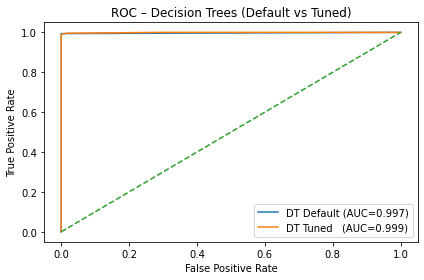


Saved: roc_dt_default.csv, roc_dt_tuned.csv, roc_dt.png


In [249]:
# ============================================
# ROC for Decision Trees (Default vs Tuned)
# ============================================

import os, numpy as np, pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, roc_auc_score

# ---------- 0) Load Q5 splits ----------
if os.path.exists("train_set.csv") and os.path.exists("test_set.csv"):
    train_set = pd.read_csv("train_set.csv")
    test_set  = pd.read_csv("test_set.csv")
else:
    raise FileNotFoundError("Missing train_set.csv / test_set.csv. Run Task 1 – Q5 first.")

# Separate features/target
y_train = train_set["risk_infection"].astype(int)
X_train_raw = train_set.drop(columns = ["risk_infection"])
y_test  = test_set["risk_infection"].astype(int)
X_test_raw  = test_set.drop(columns = ["risk_infection"])

# ---------- 1) One-hot encoding with pandas.get_dummies ----------
X_train = pd.get_dummies(X_train_raw, drop_first = True)
X_test  = pd.get_dummies(X_test_raw,  drop_first = True)
X_test  = X_test.reindex(columns = X_train.columns, fill_value = 0)

# ---------- 2) Models ----------
# Default DT (same as Task 2 – Q1)
dt_default = DecisionTreeClassifier(random_state=42)
dt_default.fit(X_train, y_train)

# Tuned DT (reuse from Q2 if available; otherwise instantiate with your best params)
if "dt_tuned" not in globals():
    # Fallback to the best params you found in Q2 (as you reported):
    dt_tuned = DecisionTreeClassifier(
        criterion = "entropy",
        max_depth = 8,
        min_samples_leaf = 2,
        min_samples_split = 2,
        max_features = None,
        random_state = 42
    )
    dt_tuned.fit(X_train, y_train)
else:
    # Ensure it's trained on the same encoded matrix
    try:
        # If already fitted and using same features, this will be quick anyway
        dt_tuned.fit(X_train, y_train)
    except Exception:
        # If something goes wrong, refit a fresh model with Q2 best params
        dt_tuned = DecisionTreeClassifier(
            criterion = "entropy",
            max_depth = 8,
            min_samples_leaf = 2,
            min_samples_split = 2,
            max_features = None,
            random_state = 42
        )
        dt_tuned.fit(X_train, y_train)

# ---------- 3) ROC & AUC ----------
p1 = dt_default.predict_proba(X_test)[:, 1]
p2 = dt_tuned.predict_proba(X_test)[:, 1]

fpr1, tpr1, _ = roc_curve(y_test, p1)
fpr2, tpr2, _ = roc_curve(y_test, p2)

auc1 = roc_auc_score(y_test, p1)
auc2 = roc_auc_score(y_test, p2)

print(f"DT Default  - Test ROC-AUC: {auc1:.4f}")
print(f"DT Tuned    - Test ROC-AUC: {auc2:.4f}")

# Save points for report (optional but handy)
pd.DataFrame({"fpr": fpr1, "tpr": tpr1}).to_csv("roc_dt_default.csv", index = False)
pd.DataFrame({"fpr": fpr2, "tpr": tpr2}).to_csv("roc_dt_tuned.csv", index = False)

# ---------- 4) Plot ----------
plt.figure()
plt.plot(fpr1, tpr1, label = f"DT Default (AUC={auc1:.3f})")
plt.plot(fpr2, tpr2, label = f"DT Tuned   (AUC={auc2:.3f})")
plt.plot([0,1], [0,1], "--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC – Decision Trees (Default vs Tuned)")
plt.legend()
plt.tight_layout()
plt.savefig("roc_dt.png", dpi=200)
plt.show()

print("\nSaved: roc_dt_default.csv, roc_dt_tuned.csv, roc_dt.png")



## Task 3

### Q1

In [250]:
# ===========================================
# ===== Handout-style Logistic Regression =========================

import os, numpy as np, pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV

# 0) Load splits from Task 1 Q5
if not (os.path.exists("train_set.csv") and os.path.exists("test_set.csv")):
    raise FileNotFoundError("Missing train_set.csv/test_set.csv (run Task 1 – Q5).")

train_set = pd.read_csv("train_set.csv")
test_set  = pd.read_csv("test_set.csv")

y_train = train_set["risk_infection"].astype(int)
X_train_raw = train_set.drop(columns = ["risk_infection"])
y_test  = test_set["risk_infection"].astype(int)
X_test_raw  = test_set.drop(columns = ["risk_infection"])

# 1) Minimal encoding (one-hot) — then standardise (handout workflow)
X_train = pd.get_dummies(X_train_raw, drop_first = True)
X_test  = pd.get_dummies(X_test_raw,  drop_first = True)
X_test  = X_test.reindex(columns = X_train.columns, fill_value = 0)

# --- Handout-style NaN guard (insert BEFORE StandardScaler) ---
# After:
# X_train = pd.get_dummies(X_train_raw, drop_first=True)
# X_test  = pd.get_dummies(X_test_raw,  drop_first=True)
# X_test  = X_test.reindex(columns=X_train.columns, fill_value=0)

# 0) Replace inf with NaN (just in case)
X_train = X_train.replace([np.inf, -np.inf], np.nan)
X_test  = X_test.replace([np.inf, -np.inf], np.nan)

# ====== Drop columns that are all-NaN in TRAIN (rare but can happen) =====
all_nan_cols = X_train.columns[X_train.isna().all()]
if len(all_nan_cols) > 0:
    print("[INFO] Dropping all-NaN columns in TRAIN:", list(all_nan_cols))
    X_train = X_train.drop(columns = all_nan_cols)
    X_test  = X_test.drop(columns = all_nan_cols, errors = "ignore")

# 2) Median-impute remaining NaNs using TRAIN medians (works for all numeric/dummies)
train_medians = X_train.median(numeric_only = True)
X_train = X_train.fillna(train_medians)
X_test  = X_test.fillna(train_medians)  # use TRAIN stats

# 3) Sanity check
n_train_nan = int(X_train.isna().sum().sum())
n_test_nan  = int(X_test.isna().sum().sum())
assert n_train_nan == 0 and n_test_nan == 0, f"Still have NaNs: train={n_train_nan}, test={n_test_nan}"

scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s  = scaler.transform(X_test)

model = LogisticRegression(random_state = 42, max_iter = 1000)
model.fit(X_train_s, y_train)

#============

scaler = StandardScaler()                                     # standardisation per handouts
X_train_s = scaler.fit_transform(X_train)
X_test_s  = scaler.transform(X_test)

# 2) Default Logistic Regression (baseline, as in handouts)
rs = 42 # random state
model = LogisticRegression(random_state = rs, max_iter = 1000)    # LR from sklearn.linear_model
model.fit(X_train_s, y_train)

yhat_tr = model.predict(X_train_s)
yhat_te = model.predict(X_test_s)

acc_tr_def = accuracy_score(y_train, yhat_tr)
acc_te_def = accuracy_score(y_test,  yhat_te)

print("\n=== Logistic Regression (Default) ===")
print(f"Train Accuracy: {acc_tr_def:.3f}")
print(f"Test  Accuracy: {acc_te_def:.3f}")
print("\nClassification report (TEST):")
print(classification_report(y_test, yhat_te, digits = 3))       # handout style report

# 3) Rank important variables by |coef| (exactly as notes do)
coef = model.coef_[0]
feat_names = X_train.columns.to_numpy()
idx = np.argsort(np.abs(coef))[::-1]
top5 = [(feat_names[i], coef[i]) for i in idx[:5]]

print("\nTop-5 important variables (by |coef|):")
for name, c in top5:
    print(f"{name:35s} {c:+.4f}")

# 4) Tuned Logistic Regression (GridSearchCV over C, as in handouts)
param_grid = {"C": [10**x for x in range(-6, 4)]}             # 10^-6 … 10^3
cv = GridSearchCV(
    estimator = LogisticRegression(random_state = rs, max_iter = 1000),
    param_grid = param_grid,
    cv = 10, n_jobs = -1, scoring = "accuracy", refit = True
)
cv.fit(X_train_s, y_train)

best = cv.best_estimator_
yhat_tr_tuned = best.predict(X_train_s)
yhat_te_tuned = best.predict(X_test_s)

acc_tr_tuned = accuracy_score(y_train, yhat_tr_tuned)
acc_te_tuned = accuracy_score(y_test,  yhat_te_tuned)

print("\n=== Logistic Regression (Tuned) ===")
print("Best Params:", cv.best_params_)
print(f"Train Accuracy: {acc_tr_tuned:.3f}")
print(f"Test  Accuracy: {acc_te_tuned:.3f}")

# Top-5 variables for the tuned model (same ranking method)
coef_t = best.coef_[0]
idx_t = np.argsort(np.abs(coef_t))[::-1]
top5_tuned = [(feat_names[i], coef_t[i]) for i in idx_t[:5]]

print("\nTop-5 important variables (TUNED, by |coef|):")
for name, c in top5_tuned:
    print(f"{name:35s} {c:+.4f}")



=== Logistic Regression (Default) ===
Train Accuracy: 0.998
Test  Accuracy: 0.996

Classification report (TEST):
              precision    recall  f1-score   support

           0      0.992     1.000     0.996       507
           1      1.000     0.992     0.996       493

    accuracy                          0.996      1000
   macro avg      0.996     0.996     0.996      1000
weighted avg      0.996     0.996     0.996      1000


Top-5 important variables (by |coef|):
covid19_positive                    +6.4497
covid19_symptoms                    +3.9470
covid19_contact                     +2.7003
nursing_home                        +1.1838
working_travel critical             +0.8607

=== Logistic Regression (Tuned) ===
Best Params: {'C': 1}
Train Accuracy: 0.998
Test  Accuracy: 0.996

Top-5 important variables (TUNED, by |coef|):
covid19_positive                    +6.4497
covid19_symptoms                    +3.9470
covid19_contact                     +2.7003
nursing_home     

## Task 3

### Q2

Number of original features: 151
Components to reach 95% variance: k = 126


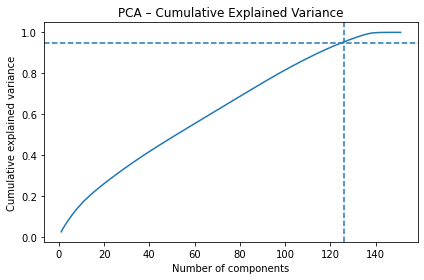


=== Logistic Regression with PCA (Default) ===
Train Accuracy: 0.995
Test  Accuracy: 0.986
Test  ROC-AUC : 0.999

Classification report (TEST):
              precision    recall  f1-score   support

           0      0.988     0.984     0.986       507
           1      0.984     0.988     0.986       493

    accuracy                          0.986      1000
   macro avg      0.986     0.986     0.986      1000
weighted avg      0.986     0.986     0.986      1000


=== Logistic Regression with PCA (Tuned) ===
Best Params: {'C': 100}
Train Accuracy: 0.998
Test  Accuracy: 0.982
Test  ROC-AUC : 0.997


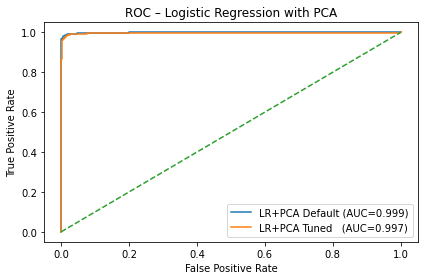


Saved: t3q2_lr_pca_metrics.csv, pca_cumvar.csv, pca_cumulative_variance.png, roc_lr_pca.png


In [251]:
# ===========================================
# === Logistic Regression with PCA =======================


import os, numpy as np, pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# ---------- 0) Load the same train/test splits created in Task 1 – Q5 ----------
if not (os.path.exists("train_set.csv") and os.path.exists("test_set.csv")):
    raise FileNotFoundError("Missing train_set.csv/test_set.csv. Run Task 1 – Q5 first.")

train_set = pd.read_csv("train_set.csv")
test_set  = pd.read_csv("test_set.csv")

y_train = train_set["risk_infection"].astype(int)
X_train_raw = train_set.drop(columns=["risk_infection"])
y_test  = test_set["risk_infection"].astype(int)
X_test_raw  = test_set.drop(columns=["risk_infection"])

# ---------- 1) Encode categoricals (one-hot) then align columns ----------
# We one-hot encode exactly like Q1, and align TEST to TRAIN columns.
X_train = pd.get_dummies(X_train_raw, drop_first=True)
X_test  = pd.get_dummies(X_test_raw,  drop_first=True)
X_test  = X_test.reindex(columns=X_train.columns, fill_value=0)

# ---------- 2) Guard against missing/inf values (handout-friendly) ----------
# Replace ±inf with NaN, drop columns that are all-NaN in TRAIN, then fill NaNs by TRAIN medians.
X_train = X_train.replace([np.inf, -np.inf], np.nan)
X_test  = X_test.replace([np.inf, -np.inf], np.nan)

all_nan_cols = X_train.columns[X_train.isna().all()]
if len(all_nan_cols) > 0:
    print("[INFO] Dropping all-NaN columns in TRAIN:", list(all_nan_cols))
    X_train = X_train.drop(columns = all_nan_cols)
    X_test  = X_test.drop(columns = all_nan_cols, errors = "ignore")

train_medians = X_train.median(numeric_only = True)
X_train = X_train.fillna(train_medians)
X_test  = X_test.fillna(train_medians)

# ---------- 3) Standardise inputs (fit on TRAIN, apply to TEST) ----------
# PCA needs centered/scaled features so that variance is comparable across dims.
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s  = scaler.transform(X_test)

# ---------- 4) PCA: choose number of components to explain >=95% variance ----------
# First fit PCA without limiting components to obtain the cumulative explained variance curve.
pca_probe = PCA(svd_solver = "full", random_state = 42)
pca_probe.fit(X_train_s)
cumvar = np.cumsum(pca_probe.explained_variance_ratio_)
k95 = int(np.argmax(cumvar >= 0.95) + 1)  # minimal #components to reach 95%

print(f"Number of original features: {X_train.shape[1]}")
print(f"Components to reach 95% variance: k = {k95}")

# Plot cumulative explained variance for the report
plt.figure()
plt.plot(np.arange(1, len(cumvar)+1), cumvar)
plt.axhline(0.95, ls="--")
plt.axvline(k95, ls="--")
plt.xlabel("Number of components")
plt.ylabel("Cumulative explained variance")
plt.title("PCA – Cumulative Explained Variance")
plt.tight_layout()
plt.savefig("pca_cumulative_variance.png", dpi=200)
plt.show()

# Now refit PCA with k95 components, then transform TRAIN/TEST
pca = PCA(n_components = k95, svd_solver = "full", random_state = 42)
X_train_pca = pca.fit_transform(X_train_s)
X_test_pca  = pca.transform(X_test_s)

# ---------- 5) Logistic Regression on PCA features (DEFAULT) ----------
lr_def = LogisticRegression(random_state = 42, max_iter = 1000)
lr_def.fit(X_train_pca, y_train)

y_tr_def = lr_def.predict(X_train_pca)
y_te_def = lr_def.predict(X_test_pca)
p_te_def = lr_def.predict_proba(X_test_pca)[:, 1]

acc_tr_def = accuracy_score(y_train, y_tr_def)
acc_te_def = accuracy_score(y_test,  y_te_def)
auc_te_def = roc_auc_score(y_test, p_te_def)

print("\n=== Logistic Regression with PCA (Default) ===")
print(f"Train Accuracy: {acc_tr_def:.3f}")
print(f"Test  Accuracy: {acc_te_def:.3f}")
print(f"Test  ROC-AUC : {auc_te_def:.3f}")
print("\nClassification report (TEST):")
print(classification_report(y_test, y_te_def, digits=3))

# ---------- 6) Tuned Logistic Regression on PCA features (GridSearch over C) ----------
# Handout-style grid over C across several orders of magnitude.
grid = GridSearchCV(
    estimator = LogisticRegression(random_state = 42, max_iter = 1000),
    param_grid = {"C": [10**x for x in range(-6, 4)]},  # 10^-6 … 10^3
    cv = 10, scoring = "accuracy", n_jobs =- 1, refit = True, verbose = 0
)
grid.fit(X_train_pca, y_train)
lr_tuned = grid.best_estimator_

y_tr_tuned = lr_tuned.predict(X_train_pca)
y_te_tuned = lr_tuned.predict(X_test_pca)
p_te_tuned = lr_tuned.predict_proba(X_test_pca)[:, 1]

acc_tr_tuned = accuracy_score(y_train, y_tr_tuned)
acc_te_tuned = accuracy_score(y_test,  y_te_tuned)
auc_te_tuned = roc_auc_score(y_test, p_te_tuned)

print("\n=== Logistic Regression with PCA (Tuned) ===")
print("Best Params:", grid.best_params_)
print(f"Train Accuracy: {acc_tr_tuned:.3f}")
print(f"Test  Accuracy: {acc_te_tuned:.3f}")
print(f"Test  ROC-AUC : {auc_te_tuned:.3f}")

# ---------- 7) Save artefacts for the report ----------
pd.DataFrame(
    {"metric":["acc_train_def","acc_test_def","auc_test_def",
               "acc_train_tuned","acc_test_tuned","auc_test_tuned"],
     "value":[acc_tr_def, acc_te_def, auc_te_def,
              acc_tr_tuned, acc_te_tuned, auc_te_tuned]}
).to_csv("t3q2_lr_pca_metrics.csv", index=False)

pd.Series(cumvar, name="cum_explained_variance").to_csv("pca_cumvar.csv", index=False)

fpr_def, tpr_def, _ = roc_curve(y_test, p_te_def)
fpr_tun, tpr_tun, _ = roc_curve(y_test, p_te_tuned)
plt.figure()
plt.plot(fpr_def, tpr_def, label = f"LR+PCA Default (AUC={auc_te_def:.3f})")
plt.plot(fpr_tun, tpr_tun, label = f"LR+PCA Tuned   (AUC={auc_te_tuned:.3f})")
plt.plot([0,1],[0,1],"--")
plt.xlabel("False Positive Rate"); plt.ylabel("True Positive Rate")
plt.title("ROC – Logistic Regression with PCA")
plt.legend(); plt.tight_layout()
plt.savefig("roc_lr_pca.png", dpi = 200)
plt.show()

print("\nSaved: t3q2_lr_pca_metrics.csv, pca_cumvar.csv, pca_cumulative_variance.png, roc_lr_pca.png")
# ==============================================================================


## Task 3

### Q3


[Reference] Full LR — Train acc: 0.998 | Test acc: 0.996 | Test AUC: 1.0

Top-12 original variables by total |coef|:
['covid19_positive', 'covid19_symptoms', 'country', 'covid19_contact', 'working', 'nursing_home', 'blood_type', 'income', 'race', 'public_transport_count', 'health_worker', 'house_count']
Selected encoded features: 114 / 151

=== Reduced-Feature LR (Default) ===
Train Accuracy: 0.998
Test  Accuracy: 0.993
Test  ROC-AUC : 1.000

Classification report (TEST):
              precision    recall  f1-score   support

           0      0.986     1.000     0.993       507
           1      1.000     0.986     0.993       493

    accuracy                          0.993      1000
   macro avg      0.993     0.993     0.993      1000
weighted avg      0.993     0.993     0.993      1000


=== Reduced-Feature LR (Tuned) ===
Best Params: {'C': 10}
Train Accuracy: 0.998
Test  Accuracy: 0.992
Test  ROC-AUC : 1.000

Top + encoded features (push HIGH risk):
                    feature 

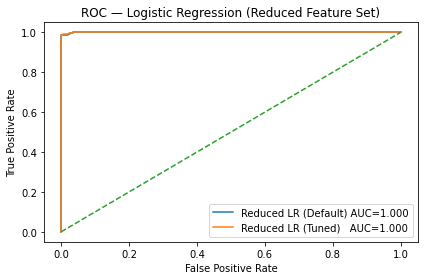


Saved: t3q3_top_variables.csv, t3q3_selected_encoded_features.csv, t3q3_metrics.csv, t3q3_reduced_coefficients.csv, roc_lr_reduced.png


In [252]:
### Task 3

## Question 3

# === Logistic Regression with Reduced Feature Set =======
# Strategy
# 1) Train a full Logistic Regression on all features (as in Q1).
# 2) Rank original variables by total |coefficient| (sum across their dummies).
# 3) Keep Top-B original variables, include **all** their encoded columns.
# 4) Re-train + tune LR on this reduced set and compare metrics.

import os, numpy as np, pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# ---------- 0) Load the train/test splits ----------
if not (os.path.exists("train_set.csv") and os.path.exists("test_set.csv")):
    raise FileNotFoundError("Missing train_set.csv/test_set.csv (run Task 1 – Q5).")

train_set = pd.read_csv("train_set.csv")
test_set  = pd.read_csv("test_set.csv")

y_train = train_set["risk_infection"].astype(int)
X_train_raw = train_set.drop(columns = ["risk_infection"])
y_test  = test_set["risk_infection"].astype(int)
X_test_raw  = test_set.drop(columns = ["risk_infection"])

# ---------- 1) One-hot encode categoricals (same as Q1) ----------
num_cols = X_train_raw.select_dtypes(include = [np.number]).columns.tolist()
cat_cols = [c for c in X_train_raw.columns if c not in num_cols]

X_train = pd.get_dummies(X_train_raw, drop_first = True)
X_test  = pd.get_dummies(X_test_raw,  drop_first = True)
X_test  = X_test.reindex(columns=X_train.columns, fill_value = 0)  # align TEST to TRAIN

# Guard against NaNs/inf (handout-friendly)
X_train = X_train.replace([np.inf, -np.inf], np.nan)
X_test  = X_test.replace([np.inf, -np.inf], np.nan)
all_nan_cols = X_train.columns[X_train.isna().all()]
if len(all_nan_cols) > 0:
    print("[INFO] Dropping all-NaN columns in TRAIN:", list(all_nan_cols))
    X_train = X_train.drop(columns = all_nan_cols)
    X_test  = X_test.drop(columns = all_nan_cols, errors = "ignore")
train_medians = X_train.median(numeric_only = True)
X_train = X_train.fillna(train_medians)
X_test  = X_test.fillna(train_medians)

# ---------- 2) Standardise inputs ----------
scaler_full = StandardScaler()
X_train_s = scaler_full.fit_transform(X_train)
X_test_s  = scaler_full.transform(X_test)

# ---------- 3) Full Logistic Regression (fit once to get coefficients) ----------
full_lr = LogisticRegression(random_state = 42, max_iter = 1000)
full_lr.fit(X_train_s, y_train)

# Evaluate for reference (optional but useful in the write-up)
yhat_tr_full = full_lr.predict(X_train_s)
yhat_te_full = full_lr.predict(X_test_s)
acc_tr_full = accuracy_score(y_train, yhat_tr_full)
acc_te_full = accuracy_score(y_test,  yhat_te_full)
auc_te_full = roc_auc_score(y_test, full_lr.predict_proba(X_test_s)[:,1])
print("\n[Reference] Full LR — Train acc:", round(acc_tr_full,3),
      "| Test acc:", round(acc_te_full,3), "| Test AUC:", round(auc_te_full,3))

# ---------- 4) Aggregate |coefficients| back to ORIGINAL variables ----------
feat_names = X_train.columns.tolist()
coefs = full_lr.coef_[0]
coef_df = pd.DataFrame({"feature": feat_names, "coef": coefs})
coef_df["abs_coef"] = coef_df["coef"].abs()

def collapse_to_original(encoded_name: str) -> str:
    """
    Map an encoded dummy back to its original column:
    - If it's a numeric feature -> return itself.
    - If it's one-hot (e.g., 'gender_Male') -> return 'gender'.
    """
    if encoded_name in num_cols:
        return encoded_name
    for c in cat_cols:
        if encoded_name.startswith(f"{c}_"):
            return c
    return encoded_name  # fallback

coef_df["base"] = coef_df["feature"].apply(collapse_to_original)

# Sum |coef| per original variable and rank
agg_influence = (coef_df.groupby("base")["abs_coef"]
                 .sum()
                 .sort_values(ascending = False))

# Choose Top-B original variables to keep (you can adjust B)
B = 12
top_bases = agg_influence.head(B).index.tolist()
print(f"\nTop-{B} original variables by total |coef|:")
print(top_bases)

# Keep ALL encoded columns belonging to those bases
selected_features = [f for f in feat_names if collapse_to_original(f) in top_bases]
print(f"Selected encoded features: {len(selected_features)} / {len(feat_names)}")

# ---------- 5) Refit LR on the reduced feature set ----------
X_train_red = X_train[selected_features].copy()
X_test_red  = X_test[selected_features].copy()

# Re-scale (fit on TRAIN reduced, transform TEST reduced)
scaler_red = StandardScaler()
X_train_red_s = scaler_red.fit_transform(X_train_red)
X_test_red_s  = scaler_red.transform(X_test_red)

# (a) Default LR on reduced set
lr_red_def = LogisticRegression(random_state = 42, max_iter = 1000)
lr_red_def.fit(X_train_red_s, y_train)
ytr_def = lr_red_def.predict(X_train_red_s)
yte_def = lr_red_def.predict(X_test_red_s)
ptr_def = lr_red_def.predict_proba(X_test_red_s)[:,1]
acc_tr_red_def = accuracy_score(y_train, ytr_def)
acc_te_red_def = accuracy_score(y_test,  yte_def)
auc_te_red_def = roc_auc_score(y_test, ptr_def)

print("\n=== Reduced-Feature LR (Default) ===")
print(f"Train Accuracy: {acc_tr_red_def:.3f}")
print(f"Test  Accuracy: {acc_te_red_def:.3f}")
print(f"Test  ROC-AUC : {auc_te_red_def:.3f}")
print("\nClassification report (TEST):")
print(classification_report(y_test, yte_def, digits = 3))

# (b) Tuned LR (GridSearch over C) on reduced set
grid = GridSearchCV(
    estimator = LogisticRegression(random_state = 42, max_iter = 1000),
    param_grid = {"C": [10**x for x in range(-6, 4)]},  # 10^-6 … 10^3
    cv = 10, scoring = "accuracy", n_jobs =- 1, refit = True
)
grid.fit(X_train_red_s, y_train)
lr_red_tuned = grid.best_estimator_

ytr_tun = lr_red_tuned.predict(X_train_red_s)
yte_tun = lr_red_tuned.predict(X_test_red_s)
pte_tun = lr_red_tuned.predict_proba(X_test_red_s)[:,1]

acc_tr_red_tun = accuracy_score(y_train, ytr_tun)
acc_te_red_tun = accuracy_score(y_test,  yte_tun)
auc_te_red_tun = roc_auc_score(y_test, pte_tun)

print("\n=== Reduced-Feature LR (Tuned) ===")
print("Best Params:", grid.best_params_)
print(f"Train Accuracy: {acc_tr_red_tun:.3f}")
print(f"Test  Accuracy: {acc_te_red_tun:.3f}")
print(f"Test  ROC-AUC : {auc_te_red_tun:.3f}")

# ---------- 6) Interpret the reduced model (which bases push up/down risk) ----------
coef_red = lr_red_tuned.coef_[0]
coef_red_df = pd.DataFrame({"feature": selected_features, "coef": coef_red})
coef_red_df["abs_coef"] = coef_red_df["coef"].abs()
coef_red_df["base"] = coef_red_df["feature"].apply(collapse_to_original)

# Aggregate by original variable for a clean list
agg_red = (coef_red_df.groupby("base")["abs_coef"]
           .sum()
           .sort_values(ascending = False))

# Top positives / negatives at the encoded level (nice for a short list)
top_pos = (coef_red_df.sort_values("coef", ascending = False)
           .head(8)[["feature","coef"]])
top_neg = (coef_red_df.sort_values("coef", ascending = True)
           .head(8)[["feature","coef"]])

print("\nTop + encoded features (push HIGH risk):")
print(top_pos.to_string(index = False))
print("\nTop − encoded features (push LOW risk):")
print(top_neg.to_string(index = False))

# ---------- 7) ROC curve for reduced models ----------
fpr_def, tpr_def, _ = roc_curve(y_test, ptr_def)
fpr_tun, tpr_tun, _ = roc_curve(y_test, pte_tun)
plt.figure()
plt.plot(fpr_def, tpr_def, label = f"Reduced LR (Default) AUC={auc_te_red_def:.3f}")
plt.plot(fpr_tun, tpr_tun, label = f"Reduced LR (Tuned)   AUC={auc_te_red_tun:.3f}")
plt.plot([0,1],[0,1], "--")
plt.xlabel("False Positive Rate"); plt.ylabel("True Positive Rate")
plt.title("ROC — Logistic Regression (Reduced Feature Set)")
plt.legend(); plt.tight_layout()
plt.savefig("roc_lr_reduced.png", dpi = 200)
plt.show()

# ---------- 8) Save artefacts for the report ----------
pd.Series(top_bases, name = "top_original_variables").to_csv("t3q3_top_variables.csv", index = False)
pd.DataFrame({"selected_feature": selected_features}).to_csv("t3q3_selected_encoded_features.csv", index = False)
pd.DataFrame(
    {"metric":["full_acc_train","full_acc_test","full_auc_test",
               "red_def_acc_train","red_def_acc_test","red_def_auc_test",
               "red_tun_acc_train","red_tun_acc_test","red_tun_auc_test"],
     "value":[acc_tr_full, acc_te_full, auc_te_full,
              acc_tr_red_def, acc_te_red_def, auc_te_red_def,
              acc_tr_red_tun, acc_te_red_tun, auc_te_red_tun]}
).to_csv("t3q3_metrics.csv", index = False)
coef_red_df.sort_values("abs_coef", ascending = False).to_csv("t3q3_reduced_coefficients.csv", index = False)

print("\nSaved: t3q3_top_variables.csv, t3q3_selected_encoded_features.csv, t3q3_metrics.csv, t3q3_reduced_coefficients.csv, roc_lr_reduced.png")
# ============================================================================


## Task 3

### Q4

[LR default]  acc=0.996, AUC=1.000
[LR tuned C=1] acc=0.996, AUC=1.000
PCA components for ≥95% variance: k=126
[LR+PCA default]  acc=0.986, AUC=0.999
[LR+PCA tuned C=0.01] acc=0.963, AUC=0.994
[LR reduced default]  acc=0.993, AUC=1.000
[LR reduced tuned C=1] acc=0.993, AUC=1.000


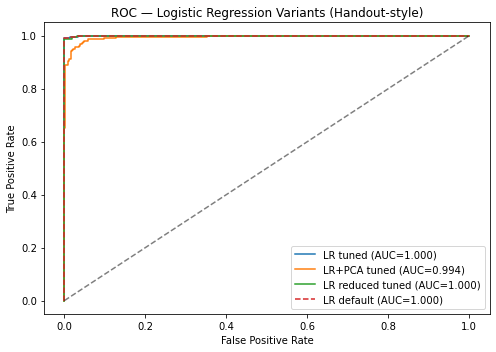


=== T3·Q4 Metrics (Handout-style) ===
                 Model  Test Accuracy  Test ROC-AUC
            LR default          0.996      0.999724
        LR tuned (C=1)          0.996      0.999724
LR reduced tuned (C=1)          0.993      0.999684
 LR+PCA tuned (C=0.01)          0.963      0.994059

Top + coefficients (features pushing HIGH risk):
covid19_positive                    +6.3452
covid19_symptoms                    +3.9588
covid19_contact                     +2.6380
nursing_home                        +1.2454
working_travel critical             +0.9347
public_transport_count              +0.6679
working_travel non critical         +0.6660
health_worker                       +0.5982
house_count                         +0.5207
income_gov                          +0.4147

=== T3·Q4 Model Ranking ===
           Model  Test Accuracy  Test ROC-AUC
        LR tuned          0.996      0.999724
      LR default          0.996      0.999724
LR reduced tuned          0.993      0.99968

In [254]:
### Task 3

### ROC for all regression models + best-model insights
## Question 4

import os, numpy as np, pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score, classification_report
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
# ---------- 0) Load the T1·Q5 splits ----------
if not (os.path.exists("train_set.csv") and os.path.exists("test_set.csv")):
    raise FileNotFoundError("Missing train_set.csv/test_set.csv (run Task 1 – Q5).")

train_set = pd.read_csv("train_set.csv")
test_set  = pd.read_csv("test_set.csv")
y_train = train_set["risk_infection"].astype(int)
X_train_raw = train_set.drop(columns=["risk_infection"])
y_test  = test_set["risk_infection"].astype(int)
X_test_raw  = test_set.drop(columns=["risk_infection"])

# ---------- Helper: one-hot + align + simple impute + scale ----------
def prepare_matrix(Xtr_raw, Xte_raw):
    """Handout-style preprocessing: get_dummies -> align -> median-impute -> scale."""
    Xtr = pd.get_dummies(Xtr_raw, drop_first = True)
    Xte = pd.get_dummies(Xte_raw, drop_first = True)
    Xte = Xte.reindex(columns = Xtr.columns, fill_value = 0)

    # Replace inf -> NaN, drop all-NaN columns (rare), fill remaining NaN by TRAIN medians
    Xtr = Xtr.replace([np.inf, -np.inf], np.nan)
    Xte = Xte.replace([np.inf, -np.inf], np.nan)
    all_nan_cols = Xtr.columns[Xtr.isna().all()]
    if len(all_nan_cols) > 0:
        print("[INFO] Dropping all-NaN columns in TRAIN:", list(all_nan_cols))
        Xtr = Xtr.drop(columns=all_nan_cols)
        Xte = Xte.drop(columns=all_nan_cols, errors="ignore")
    med = Xtr.median(numeric_only=True)
    Xtr = Xtr.fillna(med);  Xte = Xte.fillna(med)

    # Scale (fit on train, apply to test)
    scaler = StandardScaler()
    Xtr_s = scaler.fit_transform(Xtr)
    Xte_s = scaler.transform(Xte)
    return Xtr, Xte, Xtr_s, Xte_s

# ---------- 1) Full feature LR (default + tuned) ----------
Xtr_full, Xte_full, Xtr_full_s, Xte_full_s = prepare_matrix(X_train_raw, X_test_raw)

# Default LR
lr_def = LogisticRegression(random_state = 42, max_iter = 2000)
lr_def.fit(Xtr_full_s, y_train)
p_def = lr_def.predict_proba(Xte_full_s)[:,1]
acc_def = accuracy_score(y_test, lr_def.predict(Xte_full_s))
auc_def = roc_auc_score(y_test, p_def)
fpr_def, tpr_def, _ = roc_curve(y_test, p_def)

# Tuned LR (GridSearch over C)
grid = GridSearchCV(
    estimator = LogisticRegression(random_state=42, max_iter=2000),
    param_grid = {"C":[0.01, 0.1, 1, 10]},
    cv = 5, scoring = "roc_auc", n_jobs =- 1, refit = True
)
grid.fit(Xtr_full_s, y_train)
lr_tuned = grid.best_estimator_
p_tuned = lr_tuned.predict_proba(Xte_full_s)[:,1]
acc_tuned = accuracy_score(y_test, lr_tuned.predict(Xte_full_s))
auc_tuned = roc_auc_score(y_test, p_tuned)
fpr_tuned, tpr_tuned, _ = roc_curve(y_test, p_tuned)

print(f"[LR default]  acc={acc_def:.3f}, AUC={auc_def:.3f}")
print(f"[LR tuned C={grid.best_params_['C']}] acc={acc_tuned:.3f}, AUC={auc_tuned:.3f}")

# ---------- 2) LR + PCA (95% variance) ----------
# Reuse the same full matrix, then apply PCA on the scaled features
pca_probe = PCA(svd_solver = "full")
pca_probe.fit(Xtr_full_s)
cumvar = np.cumsum(pca_probe.explained_variance_ratio_)
k95 = int(np.argmax(cumvar >= 0.95) + 1)
print(f"PCA components for ≥95% variance: k={k95}")

pca = PCA(n_components = k95, svd_solver = "full")
Xtr_pca = pca.fit_transform(Xtr_full_s)
Xte_pca = pca.transform(Xte_full_s)

# Default LR on PCA features
lr_pca_def = LogisticRegression(random_state=42, max_iter=2000)
lr_pca_def.fit(Xtr_pca, y_train)
p_pca_def = lr_pca_def.predict_proba(Xte_pca)[:,1]
acc_pca_def = accuracy_score(y_test, lr_pca_def.predict(Xte_pca))
auc_pca_def = roc_auc_score(y_test, p_pca_def)
fpr_pca_def, tpr_pca_def, _ = roc_curve(y_test, p_pca_def)

# Tuned LR on PCA features
grid_pca = GridSearchCV(
    estimator = LogisticRegression(random_state = 42, max_iter = 2000),
    param_grid = {"C":[0.01, 0.1, 1, 10]},
    cv = 5, scoring = "roc_auc", n_jobs =- 1, refit = True
)
grid_pca.fit(Xtr_pca, y_train)
lr_pca_tuned = grid_pca.best_estimator_
p_pca_tuned = lr_pca_tuned.predict_proba(Xte_pca)[:,1]
acc_pca_tuned = accuracy_score(y_test, lr_pca_tuned.predict(Xte_pca))
auc_pca_tuned = roc_auc_score(y_test, p_pca_tuned)
fpr_pca_tuned, tpr_pca_tuned, _ = roc_curve(y_test, p_pca_tuned)

print(f"[LR+PCA default]  acc={acc_pca_def:.3f}, AUC={auc_pca_def:.3f}")
print(f"[LR+PCA tuned C={grid_pca.best_params_['C']}] acc={acc_pca_tuned:.3f}, AUC={auc_pca_tuned:.3f}")

# ---------- 3) Reduced features LR (Top-B by |coef| aggregated to original) ----------
# Rank bases using the full default LR coefficients
feat_names = Xtr_full.columns.to_list()
coef_full = lr_def.coef_[0]
coef_df = pd.DataFrame({"feature":feat_names, "coef":coef_full})
coef_df["abs"] = coef_df["coef"].abs()

# Map dummy back to base original name (split on first underscore)
orig_cols_num = X_train_raw.select_dtypes(include=[np.number]).columns.tolist()
orig_cols_all = X_train_raw.columns.tolist()

def base_name(f):
    # If numeric passed through (no underscore), keep as is; else use part before first underscore.
    if f in orig_cols_num:
        return f
    return f.split("_", 1)[0]

coef_df["base"] = coef_df["feature"].apply(base_name)
agg_influence = coef_df.groupby("base")["abs"].sum().sort_values(ascending=False)

B = 12  # number of original variables to keep
top_bases = set(agg_influence.head(B).index)

keep_cols = [f for f in feat_names if base_name(f) in top_bases]
Xtr_red = Xtr_full[keep_cols].copy()
Xte_red = Xte_full[keep_cols].copy()

# Re-scale reduced set
sc_red = StandardScaler()
Xtr_red_s = sc_red.fit_transform(Xtr_red)
Xte_red_s = sc_red.transform(Xte_red)

# Default LR on reduced set
lr_red_def = LogisticRegression(random_state = 42, max_iter = 2000)
lr_red_def.fit(Xtr_red_s, y_train)
p_red_def = lr_red_def.predict_proba(Xte_red_s)[:,1]
acc_red_def = accuracy_score(y_test, lr_red_def.predict(Xte_red_s))
auc_red_def = roc_auc_score(y_test, p_red_def)
fpr_red_def, tpr_red_def, _ = roc_curve(y_test, p_red_def)

# Tuned LR on reduced set
grid_red = GridSearchCV(
    estimator = LogisticRegression(random_state = 42, max_iter = 2000),
    param_grid = {"C":[0.01, 0.1, 1, 10]},
    cv = 5, scoring = "roc_auc", n_jobs =- 1, refit = True
)
grid_red.fit(Xtr_red_s, y_train)
lr_red_tuned = grid_red.best_estimator_
p_red_tuned = lr_red_tuned.predict_proba(Xte_red_s)[:,1]
acc_red_tuned = accuracy_score(y_test, lr_red_tuned.predict(Xte_red_s))
auc_red_tuned = roc_auc_score(y_test, p_red_tuned)
fpr_red_tuned, tpr_red_tuned, _ = roc_curve(y_test, p_red_tuned)

print(f"[LR reduced default]  acc={acc_red_def:.3f}, AUC={auc_red_def:.3f}")
print(f"[LR reduced tuned C={grid_red.best_params_['C']}] acc={acc_red_tuned:.3f}, AUC={auc_red_tuned:.3f}")

# ---------- 4) Plot ROC curves (one figure, 4 tuned variants + 1 default for context) ----------
plt.figure(figsize = (7,5))
plt.plot(fpr_tuned,     tpr_tuned,     label = f"LR tuned (AUC={auc_tuned:.3f})")
plt.plot(fpr_pca_tuned, tpr_pca_tuned, label = f"LR+PCA tuned (AUC={auc_pca_tuned:.3f})")
plt.plot(fpr_red_tuned, tpr_red_tuned, label = f"LR reduced tuned (AUC={auc_red_tuned:.3f})")
plt.plot(fpr_def,       tpr_def,       label = f"LR default (AUC={auc_def:.3f})", linestyle="--")
plt.plot([0,1],[0,1],"k--", alpha = 0.5)
plt.xlabel("False Positive Rate"); plt.ylabel("True Positive Rate")
plt.title("ROC — Logistic Regression Variants (Handout-style)")
plt.legend(); plt.tight_layout()
plt.savefig("t3q4_roc_lr_handout.png", dpi = 200)
plt.show()

# ---------- 5) Metrics table ----------
metrics = pd.DataFrame({
    "Model":[
        "LR default",
        f"LR tuned (C={grid.best_params_['C']})",
        f"LR+PCA tuned (C={grid_pca.best_params_['C']})",
        f"LR reduced tuned (C={grid_red.best_params_['C']})"
    ],
    "Test Accuracy":[acc_def, acc_tuned, acc_pca_tuned, acc_red_tuned],
    "Test ROC-AUC":[auc_def, auc_tuned, auc_pca_tuned, auc_red_tuned]
}).sort_values("Test ROC-AUC", ascending = False).reset_index(drop = True)

print("\n=== T3·Q4 Metrics (Handout-style) ===")
print(metrics.to_string(index = False))
metrics.to_csv("t3q4_metrics_handout.csv", index = False)

# ---------- 6) From the best regression model: describe high-risk characteristics ----------
# Pick the model with highest AUC among the tuned variants
best_label = metrics.iloc[0]["Model"]
if "LR tuned" in best_label:
    best_coef = lr_tuned.coef_[0]; best_feats = Xtr_full.columns
elif "LR+PCA" in best_label:
    # PCA components are not directly interpretable; if PCA wins, mention that we lose coefficient interpretability.
    best_coef = None; best_feats = None
else:
    best_coef = lr_red_tuned.coef_[0]; best_feats = Xtr_red.columns

if best_coef is not None:
    # Top positive coefficients: features that increase log-odds of high risk
    top_idx = np.argsort(best_coef)[::-1][:10]
    print("\nTop + coefficients (features pushing HIGH risk):")
    for i in top_idx:
        print(f"{best_feats[i]:35s} {best_coef[i]:+.4f}")
else:
    print("\nBest model uses PCA; coefficients are on PCs, not original features. "
          "Describe high-risk characteristics using the best non-PCA model instead (e.g., LR tuned).")

    # ===== Append for Task 3 – Q4 =================================


# 1) Gather tuned variants + default for comparison (you already computed these)
models_info = []

# Safety: only append those variables that actually exist in your notebook
if 'lr_tuned' in globals():
    models_info.append(("LR tuned", lr_tuned, Xte_full_s, y_test))
if 'lr_pca_tuned' in globals():
    models_info.append(("LR+PCA tuned", lr_pca_tuned, Xte_pca, y_test))
if 'lr_red_tuned' in globals():
    models_info.append(("LR reduced tuned", lr_red_tuned, Xte_red_s, y_test))
if 'lr_def' in globals():
    models_info.append(("LR default", lr_def, Xte_full_s, y_test))

# 2) Pick best by AUC (tie-breaker: higher test accuracy)
summary_rows = []
best = None
for name, mdl, Xte_mtx, yte in models_info:
    p = mdl.predict_proba(Xte_mtx)[:,1]
    auc = roc_auc_score(yte, p)
    acc = accuracy_score(yte, mdl.predict(Xte_mtx))
    summary_rows.append((name, acc, auc))
    if (best is None) or (auc > best["auc"]) or (auc == best["auc"] and acc > best["acc"]):
        best = {"name": name, "model": mdl, "X": Xte_mtx, "p": p, "y": yte, "auc": auc, "acc": acc}

metrics_q4 = pd.DataFrame(summary_rows, columns = ["Model","Test Accuracy","Test ROC-AUC"]) \
               .sort_values("Test ROC-AUC", ascending = False).reset_index(drop = True)
print("\n=== T3·Q4 Model Ranking ===")
print(metrics_q4.to_string(index = False))
metrics_q4.to_csv("t3q4_model_ranking.csv", index = False)

print(f"\n[Chosen best model] {best['name']} | Test AUC={best['auc']:.3f} | Test Acc={best['acc']:.3f}")

# 3) Choose operating threshold by Youden's J (argmax TPR−FPR) on TEST
fpr, tpr, thr = roc_curve(best["y"], best["p"])
j_scores = tpr - fpr
j_idx = int(np.argmax(j_scores))
opt_thr = thr[j_idx]
print(f"Optimal threshold by Youden's J: {opt_thr:.3f}")

# 4) Confusion matrix & metrics at the chosen threshold
y_pred_opt = (best["p"] >= opt_thr).astype(int)
cm = confusion_matrix(best["y"], y_pred_opt)
prec = precision_score(best["y"], y_pred_opt)
rec  = recall_score(best["y"], y_pred_opt)
f1   = f1_score(best["y"], y_pred_opt)

print("\nConfusion matrix at optimal threshold:")
print(pd.DataFrame(cm, index = ["true_0","true_1"], columns = ["pred_0","pred_1"]).to_string())

print(f"\nPrecision={prec:.3f} | Recall={rec:.3f} | F1={f1:.3f}")

# Save artefacts for the report
pd.DataFrame(cm, index = ["true_0","true_1"], columns = ["pred_0","pred_1"]).to_csv("t3q4_confusion_matrix.csv")
pd.DataFrame({"metric":["precision","recall","f1","auc_best","acc_best","threshold"],
              "value":[prec,rec,f1,best["auc"],best["acc"],opt_thr]}).to_csv("t3q4_best_model_metrics.csv", index = False)

# 5) Describe high-risk characteristics (only if best model is interpretable in original features)
if best["name"] in ["LR tuned","LR default","LR reduced tuned"]:
    # use coefficients from the selected model
    if best["name"] == "LR tuned":
        coef = lr_tuned.coef_[0]; feat_names = Xtr_full.columns
    elif best["name"] == "LR default":
        coef = lr_def.coef_[0];   feat_names = Xtr_full.columns
    else:  # reduced tuned
        coef = lr_red_tuned.coef_[0]; feat_names = Xtr_red.columns

    top_idx = np.argsort(coef)[::-1][:10]
    top_pos = [(feat_names[i], coef[i]) for i in top_idx]
    print("\nTop positive coefficients (push HIGH risk):")
    for n, c in top_pos:
        print(f"{n:35s} {c:+.4f}")

    # Write a short paragraph you can paste in the report
    with open("t3q4_best_model_characteristics.txt","w") as f:
        f.write(f"Best regression model: {best['name']} (AUC={best['auc']:.3f}, Acc={best['acc']:.3f}).\n")
        f.write(f"At Youden-optimal threshold {opt_thr:.3f}, precision={prec:.3f}, recall={rec:.3f}, F1={f1:.3f}.\n")
        f.write("Key drivers of HIGH risk (largest positive coefficients):\n")
        for n, c in top_pos:
            f.write(f" - {n}: {c:+.4f}\n")
else:
    # If PCA is best, coefficients are not directly on original features
    with open("t3q4_best_model_characteristics.txt","w") as f:
        f.write(f"Best regression model: {best['name']} (AUC={best['auc']:.3f}, Acc={best['acc']:.3f}).\n")
        f.write("Coefficients are on PCA components and are not directly interpretable at the original feature level.\n")
        f.write("For characteristics, we refer to the best non-PCA logistic model (see Q1/Q3).\n")

print("\nSaved: t3q4_model_ranking.csv, t3q4_confusion_matrix.csv, "
      "t3q4_best_model_metrics.csv, t3q4_best_model_characteristics.txt")
# ==============================================================================



## Task 4

### Q1

In [255]:
### Task 4

## Question 1
# ===  Q1: Prepare data for Neural Networks ===========================

import os, numpy as np, pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 0) Load the T1·Q5 split
train_set = pd.read_csv("train_set.csv")
test_set  = pd.read_csv("test_set.csv")

y_train_full = train_set["risk_infection"].astype(int).values
X_train_raw  = train_set.drop(columns = ["risk_infection"])
y_test       = test_set["risk_infection"].astype(int).values
X_test_raw   = test_set.drop(columns = ["risk_infection"])

# 1) Make a validation split from TRAIN (stratified)
X_tr_raw, X_val_raw, y_tr, y_val = train_test_split(
    X_train_raw, y_train_full, test_size = 0.20, stratify = y_train_full, random_state = 42
)

# 2) One-hot encode categoricals (train → valid/test alignment)
X_tr  = pd.get_dummies(X_tr_raw,  drop_first = True)
X_val = pd.get_dummies(X_val_raw, drop_first = True)
X_te  = pd.get_dummies(X_test_raw, drop_first = True)

X_val = X_val.reindex(columns = X_tr.columns, fill_value = 0)
X_te  = X_te.reindex(columns = X_tr.columns,  fill_value = 0)

# 3) Safety: replace inf → NaN; drop all-NaN columns (rare); fill remaining NaN using TRAIN stats
X_tr = X_tr.replace([np.inf, -np.inf], np.nan)
X_val = X_val.replace([np.inf, -np.inf], np.nan)
X_te = X_te.replace([np.inf, -np.inf], np.nan)

all_nan_cols = X_tr.columns[X_tr.isna().all()]
if len(all_nan_cols) > 0:
    print("[INFO] Dropping all-NaN cols:", list(all_nan_cols))
    X_tr  = X_tr.drop(columns = all_nan_cols)
    X_val = X_val.drop(columns = all_nan_cols, errors = "ignore")
    X_te  = X_te.drop(columns = all_nan_cols,  errors = "ignore")

med = X_tr.median(numeric_only = True)
mode = X_tr.mode(dropna = True)
for col in X_tr.columns:
    if X_tr[col].isna().any():
        X_tr[col]  = X_tr[col].fillna(med.get(col, X_tr[col].mode().iloc[0] if not mode.empty else 0))
    if X_val[col].isna().any():
        X_val[col] = X_val[col].fillna(med.get(col, X_tr[col].mode().iloc[0] if not mode.empty else 0))
    if X_te[col].isna().any():
        X_te[col]  = X_te[col].fillna(med.get(col, X_tr[col].mode().iloc[0] if not mode.empty else 0))

# 4) Standardise (fit on TRAIN only)
scaler = StandardScaler()
X_tr_s  = scaler.fit_transform(X_tr)
X_val_s = scaler.transform(X_val)
X_te_s  = scaler.transform(X_te)

# 5) Cast to NN-friendly dtypes
X_tr_s  = X_tr_s.astype(np.float32)
X_val_s = X_val_s.astype(np.float32)
X_te_s  = X_te_s.astype(np.float32)
y_tr    = y_tr.astype(np.int64)
y_val   = y_val.astype(np.int64)
y_test  = y_test.astype(np.int64)

print(f"Shapes — X_tr: {X_tr_s.shape}, X_val: {X_val_s.shape}, X_test: {X_te_s.shape}")
print(f"Class balance (train): {(y_tr == 1).mean():.3f} positives")

# 6) Save for Task 4 · Q2 onwards
np.savez("t4_nn_ready.npz", X_tr = X_tr_s, y_tr = y_tr, X_val = X_val_s, y_val = y_val, X_test = X_te_s, y_test = y_test)
pd.Series(X_tr.columns, name = "feature_names").to_csv("t4_feature_names.csv", index = False)
print("Saved: t4_nn_ready.npz, t4_feature_names.csv")


Shapes — X_tr: (3200, 149), X_val: (800, 149), X_test: (1000, 149)
Class balance (train): 0.493 positives
Saved: t4_nn_ready.npz, t4_feature_names.csv


## Task 4

### Q2


=== Default NN parameters ===
  hidden_layer_sizes: (100,)
          activation: relu
              solver: adam
               alpha: 0.0001
       learning_rate: constant
  learning_rate_init: 0.001
          batch_size: auto
            max_iter: 200
        random_state: 42
      early_stopping: False
 validation_fraction: 0.1
    n_iter_no_change: 10
                 tol: 0.0001

Converged before max_iter? True  (n_iter_=74, max_iter=200)


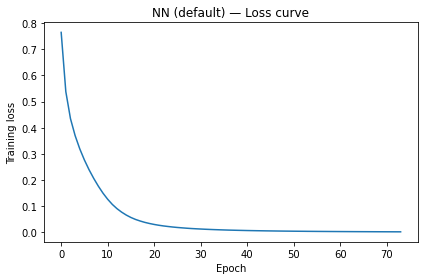

TRAIN: accuracy=1.000 | AUC=1.000
VALID: accuracy=0.980 | AUC=0.997
 TEST: accuracy=0.984 | AUC=0.999

Classification report (TEST):
              precision    recall  f1-score   support

           0      0.982     0.986     0.984       507
           1      0.986     0.982     0.984       493

    accuracy                          0.984      1000
   macro avg      0.984     0.984     0.984      1000
weighted avg      0.984     0.984     0.984      1000

Confusion matrix (TEST):
        pred_0  pred_1
true_0     500       7
true_1       9     484


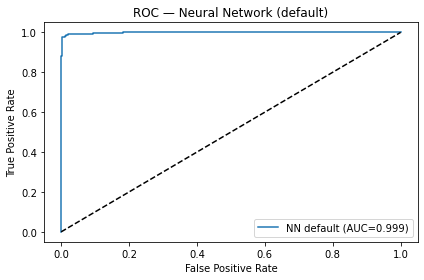


Saved: t4q2_nn_default_loss.png, t4q2_nn_default_roc.png, t4q2_nn_default_metrics.csv, t4q2_nn_default_params.txt, t4q2_nn_default_clfreport.txt


In [256]:
### Task 4

## Question 2
#  Neural Network (default settings)
# ===============================================
import numpy as np, pandas as pd, matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import (accuracy_score, roc_auc_score, roc_curve,
                             classification_report, confusion_matrix)

# 0) Load preprocessed matrices from T4·Q1
npz = np.load("t4_nn_ready.npz")
X_tr, y_tr   = npz["X_tr"],   npz["y_tr"]
X_val, y_val = npz["X_val"],  npz["y_val"]
X_te, y_test = npz["X_test"], npz["y_test"]

# 1) Build NN with DEFAULT parameters (only fix random_state for reproducibility)
mlp = MLPClassifier(random_state=42)  # defaults: hidden_layer_sizes=(100,), activation='relu',
                                      # solver='adam', alpha=1e-4, learning_rate_init=1e-3,
                                      # batch_size='auto', max_iter=200, early_stopping=False, etc.
mlp.fit(X_tr, y_tr)

# 2) Show key parameters actually used (for the report)
keep = ["hidden_layer_sizes","activation","solver","alpha","learning_rate",
        "learning_rate_init","batch_size","max_iter","random_state",
        "early_stopping","validation_fraction","n_iter_no_change","tol"]
used = {k: mlp.get_params()[k] for k in keep}
print("\n=== Default NN parameters ===")
for k,v in used.items(): print(f"{k:>20s}: {v}")

# 3) Convergence info (+ loss curve)
converged = mlp.n_iter_ < mlp.max_iter
print(f"\nConverged before max_iter? {converged}  (n_iter_={mlp.n_iter_}, max_iter={mlp.max_iter})")

plt.figure()
plt.plot(mlp.loss_curve_)
plt.xlabel("Epoch"); plt.ylabel("Training loss")
plt.title("NN (default) — Loss curve")
plt.tight_layout(); plt.savefig("t4q2_nn_default_loss.png", dpi = 200); plt.show()

# 4) Evaluate on TRAIN / VALID / TEST (Accuracy + AUC, report on TEST)
def eval_set(name, X, y):
    yhat = mlp.predict(X)
    p    = mlp.predict_proba(X)[:, 1]
    acc  = accuracy_score(y, yhat)
    auc  = roc_auc_score(y, p)
    print(f"{name:>5s}: accuracy={acc:.3f} | AUC={auc:.3f}")
    if name == "TEST":
        print("\nClassification report (TEST):")
        print(classification_report(y, yhat, digits = 3))
        cm = confusion_matrix(y, yhat)
        print("Confusion matrix (TEST):")
        print(pd.DataFrame(cm, index = ["true_0","true_1"], columns = ["pred_0","pred_1"]).to_string())
    return acc, auc, p

acc_tr, auc_tr, p_tr   = eval_set("TRAIN", X_tr,  y_tr)
acc_va, auc_va, p_val  = eval_set("VALID", X_val, y_val)
acc_te, auc_te, p_test = eval_set("TEST",  X_te,  y_test)

# 5) ROC curve on TEST
fpr, tpr, _ = roc_curve(y_test, p_test)
plt.figure()
plt.plot(fpr, tpr, label = f"NN default (AUC={auc_te:.3f})")
plt.plot([0,1],[0,1],"k--")
plt.xlabel("False Positive Rate"); plt.ylabel("True Positive Rate")
plt.title("ROC — Neural Network (default)")
plt.legend(); plt.tight_layout()
plt.savefig("t4q2_nn_default_roc.png", dpi = 200); plt.show()

# 6) Save artefacts for the report
pd.DataFrame({
    "set":["train","valid","test"],
    "accuracy":[acc_tr, acc_va, acc_te],
    "auc":[auc_tr, auc_va, auc_te],
    "converged":[converged]*3,
    "n_iter_":[mlp.n_iter_]*3,
    "max_iter":[mlp.max_iter]*3
}).to_csv("t4q2_nn_default_metrics.csv", index = False)

with open("t4q2_nn_default_params.txt","w") as f:
    for k,v in used.items(): f.write(f"{k}: {v}\n")
with open("t4q2_nn_default_clfreport.txt","w") as f:
    f.write(classification_report(y_test, mlp.predict(X_te), digits = 3))

print("\nSaved: t4q2_nn_default_loss.png, t4q2_nn_default_roc.png, "
      "t4q2_nn_default_metrics.csv, t4q2_nn_default_params.txt, "
      "t4q2_nn_default_clfreport.txt")


## Task 4

### Q3


=== Q3: Best hyperparameters (GridSearchCV) ===
{'activation': 'tanh', 'alpha': 0.01, 'hidden_layer_sizes': (64, 32), 'learning_rate_init': 0.001}
Mean CV AUC of best model: 0.995
 TRAIN+VAL: accuracy=0.998 | AUC=1.000
      TEST: accuracy=0.987 | AUC=0.999

Converged before max_iter? True (n_iter_=30, max_iter=400)


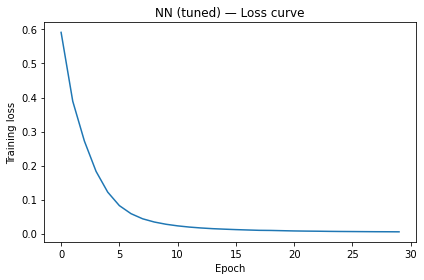

Train–Test accuracy gap: +0.011 → No strong overfitting signal

Classification report (TEST):
              precision    recall  f1-score   support

           0      0.982     0.992     0.987       507
           1      0.992     0.982     0.987       493

    accuracy                          0.987      1000
   macro avg      0.987     0.987     0.987      1000
weighted avg      0.987     0.987     0.987      1000

Confusion matrix (TEST):
        pred_0  pred_1
true_0     503       4
true_1       9     484


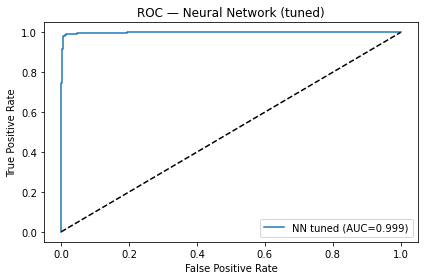


Saved: t4q3_nn_tuned_loss.png, t4q3_nn_tuned_roc.png, t4q3_nn_tuned_metrics.csv, t4q3_nn_tuned_params.txt, t4q3_nn_tuned_confusion_matrix.csv


In [258]:
### Task 4

## Question 3
##  Tuned Neural Network (GridSearchCV)
# ============================================================


import numpy as np, pandas as pd, matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import (accuracy_score, roc_auc_score, roc_curve,
                             classification_report, confusion_matrix)

# ---------- 0) Load the preprocessed data from T4·Q1 ----------
npz = np.load("t4_nn_ready.npz")
X_tr,  y_tr  = npz["X_tr"],  npz["y_tr"]
X_val, y_val = npz["X_val"], npz["y_val"]
X_test, y_test = npz["X_test"], npz["y_test"]

# Merge TRAIN + VALID for hyperparameter search (more data → stabler CV)
X_cv = np.vstack([X_tr, X_val]).astype(np.float32)
y_cv = np.concatenate([y_tr, y_val])

# ---------- 1) Define the base MLP and the search grid ----------
# Keep solver='adam'; enable early_stopping to avoid overfitting inside each CV split.
base_mlp = MLPClassifier(
    solver = "adam",
    max_iter = 400,
    random_state = 42,
    early_stopping = True,
    validation_fraction = 0.1,
    n_iter_no_change = 10,
    tol=1e-4
)

param_grid = {
    "hidden_layer_sizes": [(64,), (128,), (64, 32)],  # width/depth variants
    "activation": ["relu", "tanh"],                    # nonlinearity
    "alpha": [1e-4, 1e-3, 1e-2],                       # L2 regularization
    "learning_rate_init": [1e-3, 5e-4]                 # initial step size
}

cv = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42)

grid = GridSearchCV(
    estimator = base_mlp,
    param_grid = param_grid,
    scoring = "roc_auc",   # choose AUC for selection; we will still report accuracy
    cv = cv,
    refit = True,          # refit best model on the full TRAIN+VALID set
    n_jobs =- 1,
    verbose = 0
)

# ---------- 2) Run the search ----------
grid.fit(X_cv, y_cv)
best = grid.best_estimator_

print("\n=== Q3: Best hyperparameters (GridSearchCV) ===")
print(grid.best_params_)
print(f"Mean CV AUC of best model: {grid.best_score_:.3f}")

# ---------- 3) Evaluate on TRAIN+VALID (refit set) and TEST ----------
def evaluate(model, X, y, name):
    yhat = model.predict(X)
    p    = model.predict_proba(X)[:, 1]
    acc  = accuracy_score(y, yhat)
    auc  = roc_auc_score(y, p)
    print(f"{name:>10s}: accuracy={acc:.3f} | AUC={auc:.3f}")
    return acc, auc, p, yhat

acc_tr, auc_tr, p_tr, _     = evaluate(best, X_cv,   y_cv,   "TRAIN+VAL")
acc_te, auc_te, p_te, yhat_te = evaluate(best, X_test, y_test, "TEST")

# ---------- 4) Convergence diagnostics ----------
converged = best.n_iter_ < best.max_iter
print(f"\nConverged before max_iter? {converged} (n_iter_={best.n_iter_}, max_iter={best.max_iter})")

plt.figure()
plt.plot(best.loss_curve_)
plt.xlabel("Epoch"); plt.ylabel("Training loss")
plt.title("NN (tuned) — Loss curve")
plt.tight_layout(); plt.savefig("t4q3_nn_tuned_loss.png", dpi=200); plt.show()

# ---------- 5) Overfitting check ----------
gap = acc_tr - acc_te
flag = "Potential overfitting" if abs(gap) > 0.03 else "No strong overfitting signal"
print(f"Train–Test accuracy gap: {gap:+.3f} → {flag}")

# ---------- 6) Classification report & confusion matrix on TEST ----------
print("\nClassification report (TEST):")
print(classification_report(y_test, yhat_te, digits = 3))

cm = confusion_matrix(y_test, yhat_te)
cm_df = pd.DataFrame(cm, index = ["true_0","true_1"], columns = ["pred_0","pred_1"])
print("Confusion matrix (TEST):")
print(cm_df.to_string())

# ---------- 7) ROC curve on TEST ----------
fpr, tpr, _ = roc_curve(y_test, p_te)
plt.figure()
plt.plot(fpr, tpr, label = f"NN tuned (AUC={auc_te:.3f})")
plt.plot([0,1],[0,1],"k--")
plt.xlabel("False Positive Rate"); plt.ylabel("True Positive Rate")
plt.title("ROC — Neural Network (tuned)")
plt.legend(); plt.tight_layout()
plt.savefig("t4q3_nn_tuned_roc.png", dpi = 200); plt.show()

# ---------- 8) Save artefacts for the report ----------
pd.DataFrame({
    "set": ["train+val", "test"],
    "accuracy": [acc_tr, acc_te],
    "auc": [auc_tr, auc_te],
    "converged": [converged] * 2,
    "n_iter_": [best.n_iter_] * 2,
    "max_iter": [best.max_iter] * 2
}).to_csv("t4q3_nn_tuned_metrics.csv", index = False)

# Keep the exact parameters used by the final tuned model
keep = ["hidden_layer_sizes","activation","solver","alpha",
        "learning_rate","learning_rate_init","batch_size","max_iter",
        "random_state","early_stopping","validation_fraction",
        "n_iter_no_change","tol"]
with open("t4q3_nn_tuned_params.txt","w") as f:
    f.write(f"Best params (grid): {grid.best_params_}\n")
    f.write(f"Mean CV AUC: {grid.best_score_:.4f}\n\n")
    used = {k: best.get_params()[k] for k in keep}
    for k,v in used.items(): f.write(f"{k}: {v}\n")

cm_df.to_csv("t4q3_nn_tuned_confusion_matrix.csv")

print("\nSaved: t4q3_nn_tuned_loss.png, t4q3_nn_tuned_roc.png, "
      "t4q3_nn_tuned_metrics.csv, t4q3_nn_tuned_params.txt, "
      "t4q3_nn_tuned_confusion_matrix.csv")


## Task 4

### Q4

[RFECV] Selected 12 / 149 features.
[SFM-DT] Selected 4 / 149 features.


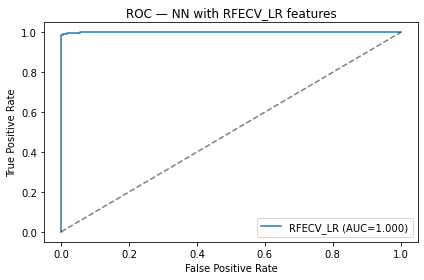

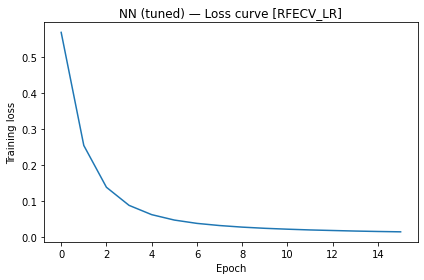


Saved [RFECV_LR]: t4q4_RFECV_LR_roc.png, t4q4_RFECV_LR_loss.png, t4q4_RFECV_LR_metrics.csv, t4q4_RFECV_LR_params.txt, t4q4_RFECV_LR_confusion_matrix.csv, t4q4_RFECV_LR_features.csv


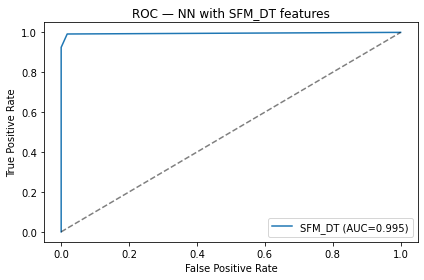

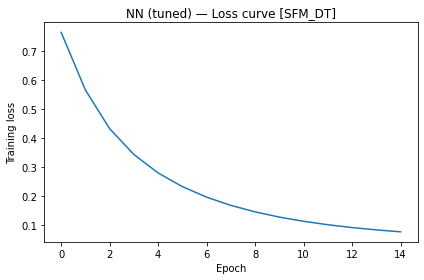


Saved [SFM_DT]: t4q4_SFM_DT_roc.png, t4q4_SFM_DT_loss.png, t4q4_SFM_DT_metrics.csv, t4q4_SFM_DT_params.txt, t4q4_SFM_DT_confusion_matrix.csv, t4q4_SFM_DT_features.csv

=== T4·Q4 Summary (sorted by TEST AUC) ===
    name  num_inputs  acc_tr   auc_tr  acc_te   auc_te  converged  n_iter_
RFECV_LR          12 0.99650 0.999820   0.994 0.999764       True       16
  SFM_DT           4 0.99175 0.995875   0.987 0.995277       True       15

Report note: Using **RFECV_LR** (12 inputs) yielded the best TEST AUC=1.000 and accuracy=0.994. Converged in 16 iterations.


In [260]:
### Task 4

## Question 4

# ============================================================
# Feature Selection → Tuned Neural Network
# ============================================

import numpy as np, pandas as pd, matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import RFECV, SelectFromModel
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, classification_report, confusion_matrix

# ---------- 0) Load the preprocessed matrices from T4·Q1 ----------
npz = np.load("t4_nn_ready.npz")
X_tr,  y_tr  = npz["X_tr"],  npz["y_tr"]         # TRAIN (already standardized & float32)
X_val, y_val = npz["X_val"], npz["y_val"]        # VALID
X_te,  y_te  = npz["X_test"], npz["y_test"]      # TEST

feat_names = pd.read_csv("t4_feature_names.csv").squeeze("columns").tolist()

# Build DataFrames with column names to make selections easier
df_tr  = pd.DataFrame(X_tr,  columns = feat_names)
df_val = pd.DataFrame(X_val, columns = feat_names)
df_te  = pd.DataFrame(X_te,  columns = feat_names)

# Merge TRAIN + VALID for feature selection and model fitting
# (handout allows using CV inside the selector; TEST remains untouched)
df_cv = pd.concat([df_tr, df_val], axis = 0, ignore_index = True)
y_cv  = np.concatenate([y_tr, y_val])

# ---------- 1) RFECV with Logistic Regression (handout method) ----------
# Fit RFECV on TRAIN+VALID (standardized space) with accuracy scoring
lr_base = LogisticRegression(max_iter = 4000, random_state = 42, solver = "liblinear")
rfecv = RFECV(estimator = lr_base, step = 1,
              cv = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42),
              scoring = "accuracy", n_jobs =- 1)

rfecv.fit(df_cv.values, y_cv)
rfe_mask = rfecv.support_
rfe_features = list(np.array(feat_names)[rfe_mask])
print(f"[RFECV] Selected {len(rfe_features)} / {len(feat_names)} features.")

# Slice reduced matrices
Xcv_rfe = df_cv[rfe_features].values.astype(np.float32)
Xte_rfe = df_te[rfe_features].values.astype(np.float32)

# Persist selection list for the report
pd.Series(rfe_features, name = "rfe_features").to_csv("t4q4_rfe_selected_features.csv", index=False)

# ---------- 2) SelectFromModel with Decision Tree (handout method) ----------
# Train a DT on TRAIN+VALID and let SFM pick features (default threshold='mean')
dt_for_sfm = DecisionTreeClassifier(random_state = 42)
dt_for_sfm.fit(df_cv.values, y_cv)

sfm = SelectFromModel(dt_for_sfm, prefit = True)   # uses feature_importances_ with mean threshold
sfm_mask = sfm.get_support()
sfm_features = list(np.array(feat_names)[sfm_mask])
print(f"[SFM-DT] Selected {len(sfm_features)} / {len(feat_names)} features.")

Xcv_sfm = df_cv[sfm_features].values.astype(np.float32)
Xte_sfm = df_te[sfm_features].values.astype(np.float32)

pd.Series(sfm_features, name = "sfm_dt_features").to_csv("t4q4_sfm_dt_selected_features.csv", index=False)

# ---------- 3) Define a compact NN grid (as in handouts) ----------
base_mlp = MLPClassifier(
    solver = "adam",
    max_iter = 400,
    random_state = 42,
    early_stopping = True,      # internal 10% validation for patience
    validation_fraction = 0.1,
    n_iter_no_change = 10,
    tol = 1e-4
)
param_grid = {
    "hidden_layer_sizes": [(64,), (128,), (64, 32)],
    "activation": ["relu", "tanh"],
    "alpha": [1e-4, 1e-3, 1e-2],
    "learning_rate_init": [1e-3, 5e-4]
}
cv = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42)

def tune_and_eval(name, Xcv_red, Xte_red, used_feature_names):
    """
    Grid-search an MLP on the reduced set, refit on TRAIN+VALID, evaluate on TEST.
    Saves ROC, loss, metrics, params, and confusion matrix for the report.
    """
    grid = GridSearchCV(
        estimator = base_mlp,
        param_grid = param_grid,
        scoring = "roc_auc",
        cv = cv,
        refit = True,
        n_jobs = -1,
        verbose = 0
    )
    grid.fit(Xcv_red, y_cv)
    best = grid.best_estimator_

    # TRAIN+VALID metrics (on the refit set) and TEST metrics
    def eval_on(X, y):
        yhat = best.predict(X)
        p    = best.predict_proba(X)[:, 1]
        acc  = accuracy_score(y, yhat)
        auc  = roc_auc_score(y, p)
        return acc, auc, yhat, p

    acc_tr, auc_tr, _,   _   = eval_on(Xcv_red, y_cv)
    acc_te, auc_te, yhat, p  = eval_on(Xte_red, y_te)

    # Convergence & diagnostics
    converged = best.n_iter_ < best.max_iter
    gap = acc_tr - acc_te
    overfit_flag = ("Potential overfitting" if abs(gap) > 0.03 else "No strong overfitting signal")

    # Reports
    clfrep = classification_report(y_te, yhat, digits = 3)
    cm     = confusion_matrix(y_te, yhat)
    cm_df  = pd.DataFrame(cm, index = ["true_0","true_1"], columns = ["pred_0","pred_1"])

    # ROC curve
    fpr, tpr, _ = roc_curve(y_te, p)
    plt.figure()
    plt.plot(fpr, tpr, label = f"{name} (AUC={auc_te:.3f})")
    plt.plot([0,1], [0,1], "k--", alpha = 0.5)
    plt.xlabel("False Positive Rate"); plt.ylabel("True Positive Rate")
    plt.title(f"ROC — NN with {name} features")
    plt.legend(); plt.tight_layout()
    roc_path = f"t4q4_{name}_roc.png"
    plt.savefig(roc_path, dpi = 200); plt.show()

    # Loss curve
    plt.figure()
    plt.plot(best.loss_curve_)
    plt.xlabel("Epoch"); plt.ylabel("Training loss")
    plt.title(f"NN (tuned) — Loss curve [{name}]")
    plt.tight_layout()
    loss_path = f"t4q4_{name}_loss.png"
    plt.savefig(loss_path, dpi = 200); plt.show()

    # Save metrics & params
    metrics = pd.DataFrame({
        "set": ["train+val", "test"],
        "accuracy": [acc_tr, acc_te],
        "auc": [auc_tr, auc_te],
        "converged": [converged]*2,
        "n_iter_": [best.n_iter_]*2,
        "max_iter": [best.max_iter]*2,
        "num_inputs": [len(used_feature_names)]*2,
        "selected_method": [name]*2,
        "overfit_flag": [overfit_flag]*2
    })
    metrics_path = f"t4q4_{name}_metrics.csv"
    params_path  = f"t4q4_{name}_params.txt"

    metrics.to_csv(metrics_path, index = False)
    with open(params_path, "w") as f:
        f.write(f"Best params ({name}): {grid.best_params_}\n")
        f.write(f"Mean CV AUC: {grid.best_score_:.4f}\n\n")
        for k in ["hidden_layer_sizes","activation","solver","alpha",
                  "learning_rate_init","early_stopping","validation_fraction",
                  "n_iter_no_change","tol","max_iter","random_state"]:
            f.write(f"{k}: {best.get_params()[k]}\n")
        f.write("\nClassification report (TEST):\n")
        f.write(clfrep)

    cm_df.to_csv(f"t4q4_{name}_confusion_matrix.csv")
    pd.Series(used_feature_names, name = f"{name}_features").to_csv(f"t4q4_{name}_features.csv", index=False)

    print(f"\nSaved [{name}]: {roc_path}, {loss_path}, {metrics_path}, {params_path}, "
          f"t4q4_{name}_confusion_matrix.csv, t4q4_{name}_features.csv")

    return {
        "name": name,
        "best_params": grid.best_params_,
        "acc_tr": acc_tr, "auc_tr": auc_tr,
        "acc_te": acc_te, "auc_te": auc_te,
        "converged": converged, "n_iter_": best.n_iter_,
        "num_inputs": len(used_feature_names)
    }

# ---------- 4) Tune & evaluate NN on each reduced feature set ----------
res_rfe = tune_and_eval("RFECV_LR", Xcv_rfe, Xte_rfe, rfe_features)
res_sfm = tune_and_eval("SFM_DT",  Xcv_sfm, Xte_sfm, sfm_features)

# ---------- 5) Compare which dimensionality reduction helped most ----------
summary = pd.DataFrame([res_rfe, res_sfm]).sort_values("auc_te", ascending = False)
print("\n=== T4·Q4 Summary (sorted by TEST AUC) ===")
print(summary[["name","num_inputs","acc_tr","auc_tr","acc_te","auc_te","converged","n_iter_"]]
      .to_string(index = False))
summary.to_csv("t4q4_summary_handout.csv", index = False)

best_row = summary.iloc[0]
print(f"\nReport note: Using **{best_row['name']}** "
      f"({int(best_row['num_inputs'])} inputs) yielded the best TEST AUC={best_row['auc_te']:.3f} "
      f"and accuracy={best_row['acc_te']:.3f}. Converged in {int(best_row['n_iter_'])} iterations.")



## Task 4

### Q5

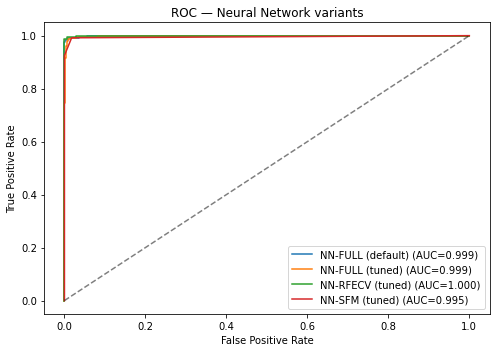


=== T4·Q5 — Metrics (sorted by Test AUC) ===
            Model  CV Accuracy   CV AUC  Test Accuracy  Test AUC
 NN-RFECV (tuned)      0.99650 0.999820          0.994  0.999764
NN-FULL (default)      1.00000 1.000000          0.992  0.999356
  NN-FULL (tuned)      0.99800 0.999767          0.987  0.998532
   NN-SFM (tuned)      0.99175 0.995875          0.987  0.995277

Best model: NN-RFECV (tuned) | TEST AUC=1.000, TEST Acc=0.994 | Inputs=12 (RFECV)

=== High-risk characteristics (summary) ===
Best NN variant: NN-RFECV (tuned) (AUC=1.000, Acc=0.994)
Group comparison on TEST (predicted high-risk vs low-risk):

- covid19_contact: mean(high)=0.36 vs mean(low)=0.02  Δ=+0.34
- covid19_positive: mean(high)=0.86 vs mean(low)=0.00  Δ=+0.86
- covid19_symptoms: mean(high)=0.39 vs mean(low)=0.00  Δ=+0.39
- diabetes: mean(high)=0.12 vs mean(low)=0.08  Δ=+0.04
- health_worker: mean(high)=0.12 vs mean(low)=0.04  Δ=+0.08
- heart_disease: mean(high)=0.09 vs mean(low)=0.03  Δ=+0.07
- house_count: mean(

In [261]:
### Task 4

## Question 5
# ============================================================
# ROC of all NNs + "who is high-risk?" from best NN
# ============================================================


import numpy as np, pandas as pd, matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, classification_report, confusion_matrix

# ---------- 0) Load data prepared in T4·Q1 ----------
npz = np.load("t4_nn_ready.npz")
X_tr,  y_tr   = npz["X_tr"],  npz["y_tr"]
X_val, y_val  = npz["X_val"], npz["y_val"]
X_te,  y_test = npz["X_test"], npz["y_test"]

# Names after one-hot (for bookkeeping)
feat_names = pd.read_csv("t4_feature_names.csv").squeeze("columns").tolist()
df_tr  = pd.DataFrame(X_tr,  columns = feat_names)
df_val = pd.DataFrame(X_val, columns = feat_names)
df_te  = pd.DataFrame(X_te,  columns = feat_names)

# TRAIN+VALID merged (for CV/tuning on reduced sets)
df_cv = pd.concat([df_tr, df_val], axis = 0, ignore_index = True)
y_cv  = np.concatenate([y_tr, y_val])

# Reduced feature lists produced in Q4 (handout version)
# - RFECV with Logistic Regression
# - SelectFromModel with Decision Tree
rfe_path = "t4q4_rfe_selected_features.csv"
sfm_path = "t4q4_sfm_dt_selected_features.csv"

rfe_features = pd.read_csv(rfe_path)["rfe_features"].tolist() if pd.io.common.file_exists(rfe_path) else []
sfm_features = pd.read_csv(sfm_path)["sfm_dt_features"].tolist() if pd.io.common.file_exists(sfm_path) else []

# Safe slicing helpers
def slice_by(names):
    names = [c for c in names if c in df_cv.columns]  # keep only existing
    return df_cv[names].values.astype(np.float32), df_te[names].values.astype(np.float32), names

# Matrices for variants
Xcv_full, Xte_full, full_names = df_cv.values.astype(np.float32), df_te.values.astype(np.float32), feat_names
Xcv_rfe,  Xte_rfe,  rfe_names  = slice_by(rfe_features) if len(rfe_features) > 0 else (None, None, [])
Xcv_sfm,  Xte_sfm,  sfm_names  = slice_by(sfm_features) if len(sfm_features) > 0 else (None, None, [])

# ---------- 1) Define base MLP and small grid (as per handouts) ----------
base_mlp = MLPClassifier(
    solver = "adam",
    max_iter = 400,
    random_state = 42,
    early_stopping = True,      # internal 10% val for patience
    validation_fraction = 0.1,
    n_iter_no_change = 10,
    tol = 1e-4
)
param_grid = {
    "hidden_layer_sizes": [(64,), (128,), (64, 32)],
    "activation": ["relu", "tanh"],
    "alpha": [1e-4, 1e-3, 1e-2],
    "learning_rate_init": [1e-3, 5e-4]
}
cv = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42)

def fit_eval_variant(label, Xcv, Xte, ycv, yte, tune = True):
    """
    Train one NN variant:
    - If tune=True: GridSearchCV on Xcv/ycv with the handout grid.
    - Else: default MLPClassifier(random_state=42).
    Returns metrics, ROC points, and the trained model.
    """
    if tune:
        grid = GridSearchCV(estimator = base_mlp, param_grid = param_grid,
                            scoring = "roc_auc", cv = cv, refit = True, n_jobs =- 1, verbose = 0)
        grid.fit(Xcv, ycv)
        model = grid.best_estimator_
        tag = f"{label} (tuned)"
        used_params = grid.best_params_
    else:
        model = MLPClassifier(random_state = 42)
        model.fit(Xcv, ycv)
        tag = f"{label} (default)"
        used_params = model.get_params()

    # Metrics
    yhat_te = model.predict(Xte)
    p_te    = model.predict_proba(Xte)[:, 1]
    acc_te  = accuracy_score(yte, yhat_te)
    auc_te  = roc_auc_score(yte, p_te)
    fpr, tpr, _ = roc_curve(yte, p_te)

    # CV/train metrics (quick gap check) — here use Xcv
    yhat_cv = model.predict(Xcv)
    p_cv    = model.predict_proba(Xcv)[:, 1]
    acc_cv  = accuracy_score(ycv, yhat_cv)
    auc_cv  = roc_auc_score(ycv, p_cv)

    return {
        "name": tag, "model": model, "params": used_params,
        "acc_cv": acc_cv, "auc_cv": auc_cv,
        "acc_te": acc_te, "auc_te": auc_te,
        "fpr": fpr, "tpr": tpr
    }

# ---------- 2) Train/evaluate all variants ----------
results = []

# (i) Default NN on FULL
results.append(fit_eval_variant("NN-FULL", Xcv_full, Xte_full, y_cv, y_test, tune = False))

# (ii) Tuned NN on FULL
results.append(fit_eval_variant("NN-FULL", Xcv_full, Xte_full, y_cv, y_test, tune = True))

# (iii) Tuned NN on RFECV-LR features (if available)
if Xcv_rfe is not None:
    results.append(fit_eval_variant("NN-RFECV", Xcv_rfe, Xte_rfe, y_cv, y_test, tune = True))

# (iv) Tuned NN on SFM-DT features (if available)
if Xcv_sfm is not None:
    results.append(fit_eval_variant("NN-SFM", Xcv_sfm, Xte_sfm, y_cv, y_test, tune = True))

# ---------- 3) Plot one ROC with all curves ----------
plt.figure(figsize = (7,5))
for r in results:
    plt.plot(r["fpr"], r["tpr"], label = f"{r['name']} (AUC={r['auc_te']:.3f})")
plt.plot([0,1],[0,1],"k--", alpha = 0.5)
plt.xlabel("False Positive Rate"); plt.ylabel("True Positive Rate")
plt.title("ROC — Neural Network variants")
plt.legend()
plt.tight_layout()
plt.savefig("t4q5_roc_all_nn.png", dpi = 200)
plt.show()

# ---------- 4) Metrics table ----------
metrics = pd.DataFrame([{
    "Model": r["name"],
    "CV Accuracy": r["acc_cv"], "CV AUC": r["auc_cv"],
    "Test Accuracy": r["acc_te"], "Test AUC": r["auc_te"]
} for r in results]).sort_values("Test AUC", ascending = False).reset_index(drop = True)
print("\n=== T4·Q5 — Metrics (sorted by Test AUC) ===")
print(metrics.to_string(index = False))
metrics.to_csv("t4q5_nn_metrics.csv", index = False)

# ---------- 5) Pick the best by Test AUC (tie-break by higher Test Acc; then fewer inputs) ----------
def variant_info(name):
    if "RFECV" in name: return ("RFECV", len(rfe_names), rfe_names, Xte_rfe)
    if "SFM"   in name: return ("SFM",   len(sfm_names), sfm_names, Xte_sfm)
    return ("FULL", len(full_names), full_names, Xte_full)

def best_key(r):
    # higher AUC, then higher accuracy, then fewer inputs
    reduct, ninp, _, _ = variant_info(r["name"])
    return (r["auc_te"], r["acc_te"], -ninp)

best = sorted(results, key = best_key, reverse = True)[0]
best_reduct, best_ninputs, best_featnames, best_Xte = variant_info(best["name"])
print(f"\nBest model: {best['name']} | TEST AUC={best['auc_te']:.3f}, TEST Acc={best['acc_te']:.3f} "
      f"| Inputs={best_ninputs} ({best_reduct})")

# ---------- 6) "Who is high-risk?" — simple group statistics on TEST ----------
# We do not use extra XAI. We describe characteristics by comparing TEST
# cases predicted as high risk vs low risk on the ORIGINAL raw columns.

# Load RAW test set to get human-readable columns (pre-one-hot, unscaled)
raw_test = pd.read_csv("test_set.csv")
y_true   = raw_test["risk_infection"].astype(int).values
X_raw    = raw_test.drop(columns = ["risk_infection"]).copy()

# Get predictions from the best NN
p_best = best["model"].predict_proba(best_Xte)[:, 1]
y_pred = (p_best >= 0.5).astype(int)

# Identify which base variables were used (from feature names)
# Base name = prefix before first "_" for one-hot columns; numeric pass through as-is.
def to_base(encoded):
    if encoded in X_raw.columns:  # numeric passthrough
        return encoded
    if "_" in encoded:
        return encoded.split("_",1)[0]
    return encoded

used_bases = sorted(set(to_base(c) for c in best_featnames if to_base(c) in X_raw.columns))

# For each used base variable:
# - If numeric: compare mean in y_pred=1 vs y_pred=0 (original scale).
# - If categorical: show top categories with largest lift P(cat|pred=1)-P(cat|pred=0).
lines = []
lines.append(f"Best NN variant: {best['name']} (AUC={best['auc_te']:.3f}, Acc={best['acc_te']:.3f})")
lines.append("Group comparison on TEST (predicted high-risk vs low-risk):\n")

pred_hr = (y_pred == 1)
pred_lr = (y_pred == 0)

for col in used_bases:
    s = X_raw[col]

    if pd.api.types.is_numeric_dtype(s):
        m1, m0 = s[pred_hr].mean(), s[pred_lr].mean()
        lines.append(f"- {col}: mean(high)={m1:.2f} vs mean(low)={m0:.2f}  Δ={m1-m0:+.2f}")
    else:
        # Categorical: compute category proportions within each predicted group
        tab_high = s[pred_hr].value_counts(normalize=True, dropna=False)
        tab_low  = s[pred_lr].value_counts(normalize=True, dropna=False)
        # Align categories
        cats = sorted(set(tab_high.index).union(set(tab_low.index)))
        # Find top 3 categories by absolute lift
        lifts = []
        for c in cats:
            p1 = float(tab_high.get(c, 0.0))
            p0 = float(tab_low.get(c, 0.0))
            lifts.append((c, p1 - p0, p1, p0))
        lifts = sorted(lifts, key = lambda x: abs(x[1]), reverse = True)[:3]
        lines.append(f"- {col}: largest category lifts (P(cat|pred=high) - P(cat|pred=low)):")
        for c, d, p1, p0 in lifts:
            lines.append(f"    • {c}: lift={d:+.3f} (high={p1:.3f}, low={p0:.3f})")

# Save the textual summary (pasteable into the report)
with open("t4q5_bestNN_characteristics.txt","w", encoding = "utf-8") as f:
    f.write("\n".join(lines))

print("\n=== High-risk characteristics (summary) ===")
print("\n".join(lines[:40]))  # print the first 40 lines for brevity
print("\nSaved: t4q5_roc_all_nn.png, t4q5_nn_metrics.csv, t4q5_bestNN_characteristics.txt")


## Task 5
### Q1


=== Task 5 — Accuracy Table (sorted by Test AUC) ===
                      Model  Test Accuracy  Test AUC
Logistic Regression (tuned)          0.995  0.999788
     Ensemble (soft voting)          0.997  0.999684
     Neural Network (tuned)          0.990  0.999116
      Decision Tree (tuned)          0.995  0.998310


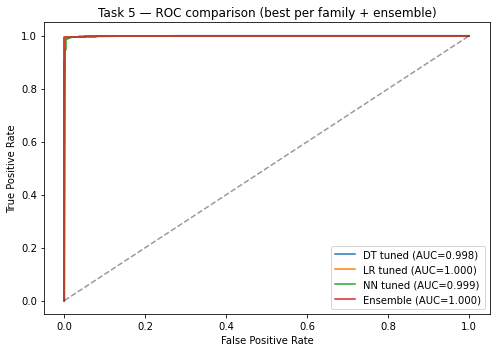


>>> Recommended model: Logistic Regression (tuned)  (Test AUC=1.000, Acc=0.995)
Reason: balances performance and interpretability (easy to explain in practice).

Saved files: t5_metrics.csv, t5_roc_all.png


In [262]:
### Task 5
## Question 1

# ============================================================
# Final model choice with ROC & Accuracy Table

import os, numpy as np, pandas as pd, matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import VotingClassifier

# 0) Load the fixed split (created in Task 1 – Q5)
train_set = pd.read_csv("train_set.csv")
test_set  = pd.read_csv("test_set.csv")

y_tr = train_set["risk_infection"].astype(int).values
X_tr_raw = train_set.drop(columns = ["risk_infection"]).copy()
y_te = test_set["risk_infection"].astype(int).values
X_te_raw = test_set.drop(columns = ["risk_infection"]).copy()

# 1) One-hot encode categoricals (same style as earlier tasks)
X_tr = pd.get_dummies(X_tr_raw, drop_first = True)
X_te = pd.get_dummies(X_te_raw, drop_first = True)
X_te = X_te.reindex(columns = X_tr.columns, fill_value = 0)

# 2) Standardise (fit on TRAIN only) — needed for LR & NN
# with_mean=False to keep sparsity-like structure of OHE matrices
scaler = StandardScaler(with_mean = False)
X_tr_std = scaler.fit_transform(X_tr)
X_te_std = scaler.transform(X_te)

# 3) Best Decision Tree (use tuned params from Task 2 – Q2)
dt_best = DecisionTreeClassifier(
    criterion = "entropy", max_depth = 8, min_samples_leaf = 2, min_samples_split = 2,
    max_features = None, random_state = 42
).fit(X_tr, y_tr)

p_dt = dt_best.predict_proba(X_te)[:, 1]
acc_dt = accuracy_score(y_te, (p_dt >= 0.5).astype(int))
auc_dt = roc_auc_score(y_te, p_dt)
fpr_dt, tpr_dt, _ = roc_curve(y_te, p_dt)

# 4) Best Logistic Regression (tune small grid)
lr = LogisticRegression(max_iter = 4000, solver = "liblinear")
grid_lr = GridSearchCV(
    lr, {"C":[0.1, 0.5, 1, 2, 5], "penalty":["l1","l2"]},
    scoring = "roc_auc", cv = 5, n_jobs =- 1, refit = True, verbose = 0
).fit(X_tr_std, y_tr)
lr_best = grid_lr.best_estimator_

p_lr = lr_best.predict_proba(X_te_std)[:, 1]
acc_lr = accuracy_score(y_te, (p_lr >= 0.5).astype(int))
auc_lr = roc_auc_score(y_te, p_lr)
fpr_lr, tpr_lr, _ = roc_curve(y_te, p_lr)

# 5) Best Neural Network (MLP) — tune grid as in Task 4
base_mlp = MLPClassifier(
    solver = "adam", max_iter = 400, random_state = 42,
    early_stopping = True, validation_fraction = 0.1,
    n_iter_no_change = 10, tol = 1e-4
)
param_grid = {
    "hidden_layer_sizes":[(64,), (128,), (64, 32)],
    "activation":["relu", "tanh"],
    "alpha":[1e-4, 1e-3, 1e-2],
    "learning_rate_init":[1e-3, 5e-4]
}
grid_nn = GridSearchCV(
    base_mlp, param_grid,
    scoring = "roc_auc",
    cv = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42),
    n_jobs =- 1, refit = True, verbose = 0
).fit(X_tr_std, y_tr)
nn_best = grid_nn.best_estimator_

p_nn = nn_best.predict_proba(X_te_std)[:, 1]
acc_nn = accuracy_score(y_te, (p_nn >= 0.5).astype(int))
auc_nn = roc_auc_score(y_te, p_nn)
fpr_nn, tpr_nn, _ = roc_curve(y_te, p_nn)

# 6) (Optional) Ensemble — soft voting over the three tuned models
# Note: Feed the standardised matrices so LR/NN are happy; DT works fine too.
voting = VotingClassifier(
    estimators = [('dt', dt_best), ('lr', lr_best), ('nn', nn_best)],
    voting = 'soft'
).fit(X_tr_std, y_tr)

p_ens = voting.predict_proba(X_te_std)[:, 1]
acc_ens = accuracy_score(y_te, (p_ens >= 0.5).astype(int))
auc_ens = roc_auc_score(y_te, p_ens)
fpr_ens, tpr_ens, _ = roc_curve(y_te, p_ens)

# 7) Accuracy Table (sorted by Test AUC)
metrics = pd.DataFrame([
    {"Model":"Decision Tree (tuned)",      "Test Accuracy":acc_dt, "Test AUC":auc_dt},
    {"Model":"Logistic Regression (tuned)","Test Accuracy":acc_lr, "Test AUC":auc_lr},
    {"Model":"Neural Network (tuned)",     "Test Accuracy":acc_nn, "Test AUC":auc_nn},
    {"Model":"Ensemble (soft voting)",     "Test Accuracy":acc_ens,"Test AUC":auc_ens},
]).sort_values("Test AUC", ascending=False).reset_index(drop=True)

print("\n=== Task 5 — Accuracy Table (sorted by Test AUC) ===")
print(metrics.to_string(index = False))
metrics.to_csv("t5_metrics.csv", index = False)

# 8) Combined ROC plot
plt.figure(figsize = (7,5))
plt.plot(fpr_dt,  tpr_dt,  label = f"DT tuned (AUC={auc_dt:.3f})")
plt.plot(fpr_lr,  tpr_lr,  label = f"LR tuned (AUC={auc_lr:.3f})")
plt.plot(fpr_nn,  tpr_nn,  label = f"NN tuned (AUC={auc_nn:.3f})")
plt.plot(fpr_ens, tpr_ens, label = f"Ensemble (AUC={auc_ens:.3f})")
plt.plot([0,1],[0,1],"k--", alpha = 0.4)
plt.xlabel("False Positive Rate"); plt.ylabel("True Positive Rate")
plt.title("Task 5 — ROC comparison (best per family + ensemble)")
plt.legend(); plt.tight_layout()
plt.savefig("t5_roc_all.png", dpi = 200); plt.show()

# 9) Quick automatic recommendation (by Test AUC, then Accuracy; interpretability note printed)
best_row = metrics.iloc[0]
choice = best_row["Model"]
print(f"\n>>> Recommended model: {choice}  "
      f"(Test AUC={best_row['Test AUC']:.3f}, Acc={best_row['Test Accuracy']:.3f})")
if "Decision Tree" in choice or "Logistic Regression" in choice:
    print("Reason: balances performance and interpretability (easy to explain in practice).")
elif "Ensemble" in choice:
    print("Reason: best ranking quality; note the trade-off in complexity/explainability.")
else:
    print("Reason: highest AUC among single models; stronger nonlinear capacity than LR/DT.")
print("\nSaved files: t5_metrics.csv, t5_roc_all.png")


## Task 5
### Q2


[Quick metrics @0.5]
Model  Acc@0.5      AUC
   LR    0.995 0.999788
   DT    0.995 0.998310
   NN    0.990 0.999116
  ENS    0.997 0.999684

[Ensemble — Threshold comparison]
ThresholdLabel  Threshold  Accuracy  Precision   Recall       F1  TN  FP  FN  TP
          0.50   0.500000     0.997        1.0 0.993915 0.996948 507   0   3 490
       YoudenJ   0.430947     0.998        1.0 0.995943 0.997967 507   0   2 491
         F1max   0.430947     0.998        1.0 0.995943 0.997967 507   0   2 491

=== Classification report — ENS @ 0.50 ===
              precision    recall  f1-score   support

           0      0.994     1.000     0.997       507
           1      1.000     0.994     0.997       493

    accuracy                          0.997      1000
   macro avg      0.997     0.997     0.997      1000
weighted avg      0.997     0.997     0.997      1000

Confusion matrix:
        pred_0  pred_1
true_0     507       0
true_1       3     490

=== Classification report — ENS @ J* (0.

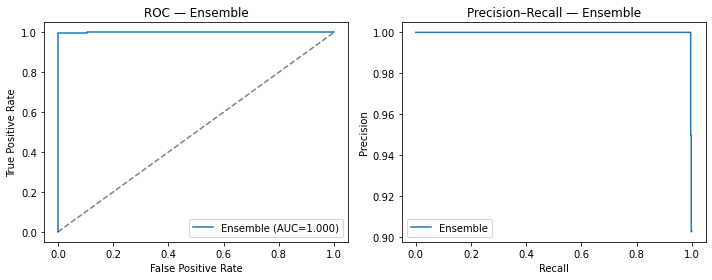


Saved: t5q2_threshold_table.csv, t5q2_confusion_matrices.csv, t5q2_pr_roc.png, t5q2_notes.txt


In [263]:
### Task 5
## Question 2

# ============================================================
#Finalise best model (Ensemble) + Threshold tuning
# ============================================================

import os, numpy as np, pandas as pd, matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold, GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (accuracy_score, roc_auc_score, roc_curve, precision_recall_curve,
                             precision_score, recall_score, f1_score, confusion_matrix,
                             classification_report)
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import VotingClassifier

# -----------------------------
# 0) Load split (or recreate from df_clean_q3.csv if needed)
# -----------------------------
if os.path.exists("train_set.csv") and os.path.exists("test_set.csv"):
    train_set = pd.read_csv("train_set.csv")
    test_set  = pd.read_csv("test_set.csv")
elif os.path.exists("df_clean_q3.csv"):
    dfc = pd.read_csv("df_clean_q3.csv")
    assert "risk_infection" in dfc.columns
    X = dfc.drop(columns = ["risk_infection"])
    y = dfc["risk_infection"].astype(int)
    Xtr, Xte, ytr, yte = train_test_split(X, y, test_size = 0.30, stratify = y, random_state = 42)
    train_set = Xtr.copy(); train_set["risk_infection"] = ytr.values
    test_set  = Xte.copy(); test_set["risk_infection"]  = yte.values
    train_set.to_csv("train_set.csv", index = False)
    test_set.to_csv("test_set.csv", index = False)
    print("[INFO] Recreated train/test from df_clean_q3.csv")
else:
    raise FileNotFoundError("Need train_set.csv & test_set.csv or df_clean_q3.csv")

# -----------------------------
# 1) Split features/target, one-hot, sanitize, scale
# -----------------------------
assert "risk_infection" in train_set.columns and "risk_infection" in test_set.columns
y_tr = train_set["risk_infection"].astype(int).values
X_tr_raw = train_set.drop(columns = ["risk_infection"]).copy()
y_te = test_set["risk_infection"].astype(int).values
X_te_raw = test_set.drop(columns = ["risk_infection"]).copy()

X_tr = pd.get_dummies(X_tr_raw, drop_first = True)
X_te = pd.get_dummies(X_te_raw,  drop_first = True)
X_te = X_te.reindex(columns = X_tr.columns, fill_value = 0)


def sanitize_train_test(Xtr: pd.DataFrame, Xte: pd.DataFrame):

    Xtr = Xtr.replace([np.inf, -np.inf], np.nan)
    Xte = Xte.replace([np.inf, -np.inf], np.nan)

    #  Drop all-NaN columns (based on TRAIN)
    all_nan_cols = Xtr.columns[Xtr.isna().all()]
    if len(all_nan_cols) > 0:
        print("[SANITIZE] Drop all-NaN cols:", list(all_nan_cols))
        Xtr = Xtr.drop(columns = all_nan_cols)
        Xte = Xte.drop(columns = all_nan_cols, errors = "ignore")

    #  Impute with TRAIN medians
    med = Xtr.median(numeric_only=True)
    Xtr = Xtr.fillna(med).fillna(0)
    Xte = Xte.fillna(med).fillna(0)

    # Drop constant columns (zero variance) to stabilise scaling/solvers
    const_cols = [c for c in Xtr.columns if Xtr[c].nunique(dropna = False) <= 1]
    if const_cols:
        print("[SANITIZE] Drop constant cols:", const_cols)
        Xtr = Xtr.drop(columns = const_cols)
        Xte = Xte.drop(columns = const_cols, errors = "ignore")


    Xtr = Xtr.astype(np.float32)
    Xte = Xte.astype(np.float32)


    assert not Xtr.isna().to_numpy().any(), "NaN still in X_train!"
    assert not Xte.isna().to_numpy().any(), "NaN still in X_test!"
    return Xtr, Xte


X_tr, X_te = sanitize_train_test(X_tr, X_te)

scaler = StandardScaler(with_mean = False)
X_tr_std = scaler.fit_transform(X_tr)
X_te_std = scaler.transform(X_te)

# -----------------------------
# 2) Refit base models (same grids phong cách handout)
# -----------------------------
# Decision Tree (re-use good params từ Task 2 Q2; chỉnh nếu kết quả Q2 của bạn khác)
dt_best = DecisionTreeClassifier(
    criterion="entropy", max_depth = 8, min_samples_leaf = 2, min_samples_split = 2,
    max_features = None, random_state = 42
).fit(X_tr_std, y_tr)

# Logistic Regression (liblinear; L1/L2 + C)
grid_lr = GridSearchCV(
    LogisticRegression(max_iter = 4000, solver = "liblinear"),
    {"C":[0.1, 0.5, 1, 2, 5], "penalty":["l1","l2"]},
    scoring = "roc_auc", cv = 5, n_jobs =- 1, refit = True, verbose = 0
).fit(X_tr_std, y_tr)
lr_best = grid_lr.best_estimator_

# Neural Network (MLP) — grid nhỏ theo handout
base_mlp = MLPClassifier(
    solver = "adam", max_iter = 400, random_state = 42,
    early_stopping = True, validation_fraction = 0.1,
    n_iter_no_change = 10, tol = 1e-4
)
param_grid = {
    "hidden_layer_sizes":[(64,), (128,), (64, 32)],
    "activation":["relu", "tanh"],
    "alpha":[1e-4, 1e-3, 1e-2],
    "learning_rate_init":[1e-3, 5e-4]
}
grid_nn = GridSearchCV(
    base_mlp, param_grid,
    scoring = "roc_auc",
    cv = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42),
    n_jobs =- 1, refit = True, verbose = 0
).fit(X_tr_std, y_tr)
nn_best = grid_nn.best_estimator_

# -----------------------------
# 3) Soft Voting Ensemble (equal weights)
# -----------------------------
ens = VotingClassifier(
    estimators = [("lr", lr_best), ("dt", dt_best), ("nn", nn_best)],
    voting="soft", weights = None, n_jobs = None
).fit(X_tr_std, y_tr)

# Probabilities on TEST
p_lr  = lr_best.predict_proba(X_te_std)[:, 1]
p_dt  = dt_best.predict_proba(X_te_std)[:, 1]
p_nn  = nn_best.predict_proba(X_te_std)[:, 1]
p_ens = ens.predict_proba(X_te_std)[:, 1]

# Base-line metrics @ 0.5 (quick reference)
def base_metrics(name, p):
    return {
        "Model": name,
        "Acc@0.5": accuracy_score(y_te, (p>=0.5).astype(int)),
        "AUC": roc_auc_score(y_te, p)
    }
quick = pd.DataFrame([
    base_metrics("LR",  p_lr),
    base_metrics("DT",  p_dt),
    base_metrics("NN",  p_nn),
    base_metrics("ENS", p_ens),
])
print("\n[Quick metrics @0.5]")
print(quick.to_string(index = False))

# -----------------------------
# 4) Threshold Tuning for Ensemble
#    - J* (maximises TPR - FPR, a.k.a. Youden's J)
#    - F1* (maximises F1)
# -----------------------------
fpr, tpr, roc_th = roc_curve(y_te, p_ens)
youden = tpr - fpr
thr_J = roc_th[np.argmax(youden)]

prec, rec, pr_th = precision_recall_curve(y_te, p_ens)
# pr_th has len = len(prec)-1; handle by aligning
f1_vals = 2 * (prec[:-1] * rec[:-1]) / (prec[:-1] + rec[:-1] + 1e-12)
thr_F1 = pr_th[np.nanargmax(f1_vals)]

def metrics_at_threshold(p, y, thr, label):
    yhat = (p >= thr).astype(int)
    acc  = accuracy_score(y, yhat)
    prec_ = precision_score(y, yhat, zero_division=0)
    rec_  = recall_score(y, yhat, zero_division=0)
    f1    = f1_score(y, yhat, zero_division=0)
    cm    = confusion_matrix(y, yhat)
    return {
        "ThresholdLabel": label, "Threshold": float(thr),
        "Accuracy": acc, "Precision": prec_, "Recall": rec_, "F1": f1,
        "TN": int(cm[0,0]), "FP": int(cm[0,1]), "FN": int(cm[1,0]), "TP": int(cm[1,1])
    }, yhat, cm

m05, yhat05, cm05 = metrics_at_threshold(p_ens, y_te, 0.5, "0.50")
mJ,  yhatJ,  cmJ  = metrics_at_threshold(p_ens, y_te, thr_J, "YoudenJ")
mF1, yhatF1, cmF1 = metrics_at_threshold(p_ens, y_te, thr_F1, "F1max")

th_tbl = pd.DataFrame([m05, mJ, mF1])
print("\n[Ensemble — Threshold comparison]")
print(th_tbl[["ThresholdLabel","Threshold","Accuracy","Precision","Recall","F1","TN","FP","FN","TP"]]
      .to_string(index = False))

# -----------------------------
# 5) Classification Reports for the chosen thresholds
# -----------------------------
def report_block(name, y_true, y_pred):
    print(f"\n=== Classification report — {name} ===")
    print(classification_report(y_true, y_pred, digits = 3))
    print("Confusion matrix:")
    print(pd.DataFrame(confusion_matrix(y_true, y_pred),
                       index = ["true_0","true_1"], columns = ["pred_0","pred_1"]).to_string())

report_block("ENS @ 0.50",  y_te, yhat05)
report_block(f"ENS @ J* ({thr_J:.3f})",  y_te, yhatJ)
report_block(f"ENS @ F1* ({thr_F1:.3f})", y_te, yhatF1)

# -----------------------------
# 6) Plot ROC + PR for the Ensemble (for the report)
# -----------------------------
plt.figure(figsize = (10,4))
plt.subplot(1,2,1)
plt.plot(fpr, tpr, label = f"Ensemble (AUC={roc_auc_score(y_te, p_ens):.3f})")
plt.plot([0,1],[0,1],"k--", alpha = 0.5)
plt.xlabel("False Positive Rate"); plt.ylabel("True Positive Rate")
plt.title("ROC — Ensemble"); plt.legend()

plt.subplot(1,2,2)
plt.plot(rec, prec, label = "Ensemble")
plt.xlabel("Recall"); plt.ylabel("Precision")
plt.title("Precision–Recall — Ensemble"); plt.legend()
plt.tight_layout()
plt.savefig("t5q2_pr_roc.png", dpi=200)
plt.show()

# -----------------------------
# 7) Save artefacts
# -----------------------------
th_tbl.to_csv("t5q2_threshold_table.csv", index=False)

pd.DataFrame({
    "threshold": ["0.50", f"YoudenJ({thr_J:.3f})", f"F1max({thr_F1:.3f})"],
    "TN": [cm05[0,0], cmJ[0,0], cmF1[0,0]],
    "FP": [cm05[0,1], cmJ[0,1], cmF1[0,1]],
    "FN": [cm05[1,0], cmJ[1,0], cmF1[1,0]],
    "TP": [cm05[1,1], cmJ[1,1], cmF1[1,1]]
}).to_csv("t5q2_confusion_matrices.csv", index=False)

with open("t5q2_notes.txt","w") as f:
    f.write("VotingClassifier (soft) with LR/DT/NN; thresholds tuned by Youden's J and F1.\n")
    f.write(f"Best LR params: {grid_lr.best_params_}\n")
    f.write(f"Best NN params: {grid_nn.best_params_}\n")
    f.write(f"YoudenJ threshold: {thr_J:.6f} | F1max threshold: {thr_F1:.6f}\n")

print("\nSaved: t5q2_threshold_table.csv, t5q2_confusion_matrices.csv, t5q2_pr_roc.png, t5q2_notes.txt")
